In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('ggplot')
sns.set(style="whitegrid")

# Make plots larger and more readable
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("Loading IPL datasets...")
# Load datasets
matches_df = pd.read_csv('/content/matches.csv')
deliveries_df = pd.read_csv('/content/deliveries.csv')

print(f"Matches dataset shape: {matches_df.shape}")
print(f"Deliveries dataset shape: {deliveries_df.shape}")

# Data preprocessing
print("Preprocessing data...")
# Convert date to datetime format
matches_df['date'] = pd.to_datetime(matches_df['date'])
# Extract year and month for seasonal analysis
matches_df['year'] = matches_df['date'].dt.year
matches_df['month'] = matches_df['date'].dt.month

# Handle missing values
matches_df['player_of_match'].fillna('Not Awarded', inplace=True)
matches_df['winner'].fillna('No Result', inplace=True)
matches_df['city'].fillna('Unknown', inplace=True)

Loading IPL datasets...
Matches dataset shape: (1095, 20)
Deliveries dataset shape: (260920, 17)
Preprocessing data...


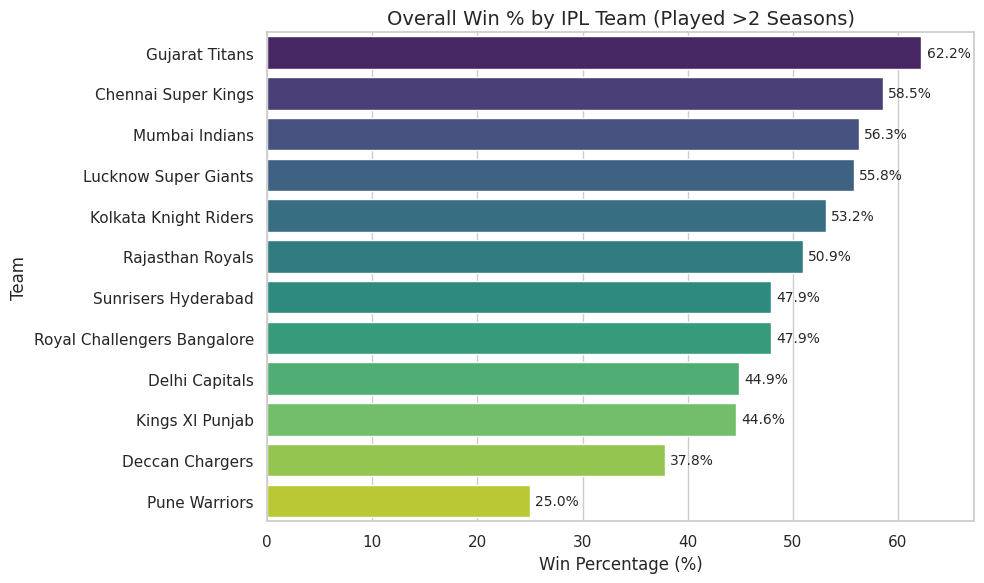

In [ ]:
name_map = {
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Punjab Kings':               'Kings XI Punjab',
    'Delhi Daredevils':           'Delhi Capitals',
    'Rising Pune Supergiant':     'Rising Pune Supergiants',
}
for col in ['team1','team2','winner','toss_winner']:
    matches[col] = matches[col].replace(name_map)

# 3. Extract season (year) and drop no‑results
matches['date']   = pd.to_datetime(matches['date'])
matches['season'] = matches['date'].dt.year
clean = matches[matches['result'] != 'no result'].copy()

# 4. Compute how many distinct seasons each team has played
#    by stacking team1 and team2, then counting unique seasons
ts = pd.concat([
    clean[['team1','season']].rename(columns={'team1':'team'}),
    clean[['team2','season']].rename(columns={'team2':'team'})
])
seasons_played = ts.groupby('team')['season'].nunique()

# 5. Keep only teams with >2 seasons
valid_teams = seasons_played[seasons_played > 2].index.tolist()
clean = clean[
    clean['team1'].isin(valid_teams) &
    clean['team2'].isin(valid_teams)
]

# 6. Count matches played per team
played1 = clean['team1'].value_counts()
played2 = clean['team2'].value_counts()
matches_played = (played1.add(played2, fill_value=0)).loc[valid_teams]

# 7. Count wins per team
wins = clean['winner'].value_counts().reindex(valid_teams).fillna(0)

# 8. Compute win percentage
win_pct = (wins / matches_played * 100).sort_values(ascending=False)

# 9. Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=win_pct.values, y=win_pct.index, palette='viridis')
plt.title('Overall Win % by IPL Team (Played >2 Seasons)', fontsize=14)
plt.xlabel('Win Percentage (%)', fontsize=12)
plt.ylabel('Team', fontsize=12)
plt.xlim(0, win_pct.max() + 5)

# Annotate
for i, pct in enumerate(win_pct):
    plt.text(pct + 0.5, i, f"{pct:.1f}%", va='center', fontsize=10)

plt.tight_layout()
plt.show()

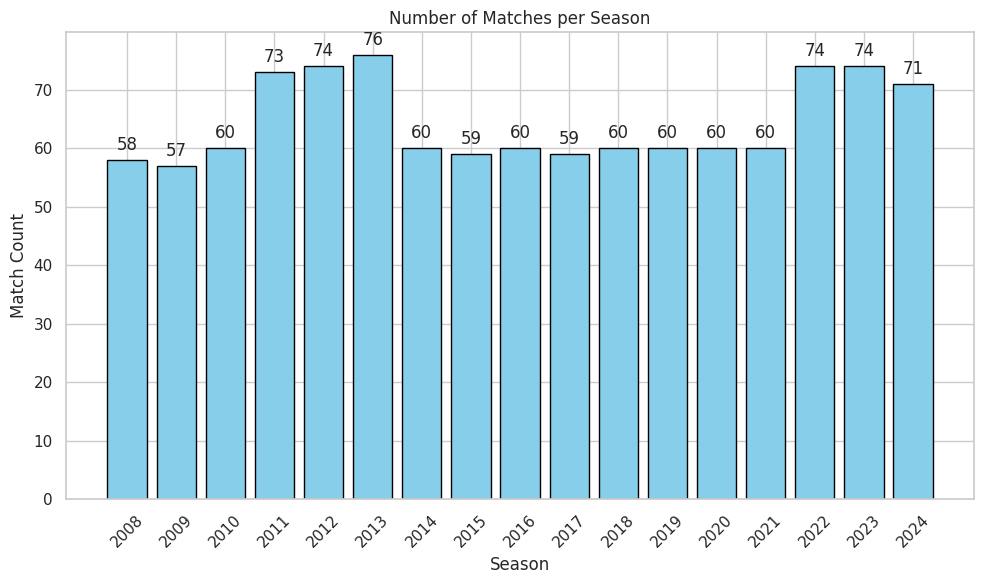

In [ ]:
matches_df['date'] = pd.to_datetime(matches_df['date'], errors='coerce')

# 1) Number of Matches per Season
matches_per_season = matches_df['season'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(matches_per_season.index.astype(str), matches_per_season.values,
        color='skyblue', edgecolor='black')
for i, v in enumerate(matches_per_season.values):
    plt.text(i, v + 1, str(v), ha='center', va='bottom')
plt.title('Number of Matches per Season')
plt.xlabel('Season')
plt.ylabel('Match Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


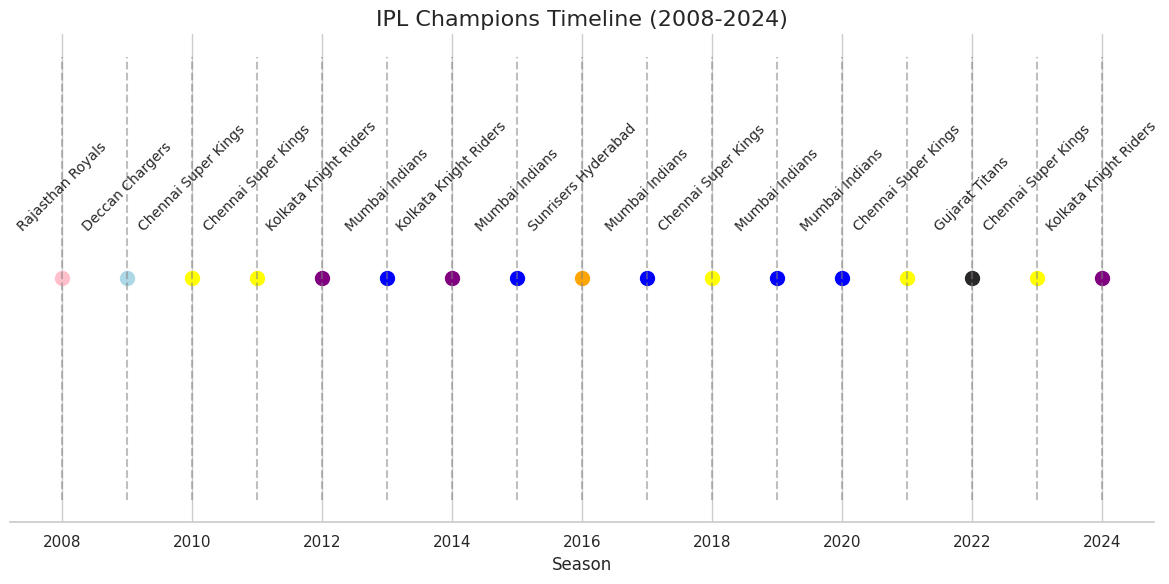

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'season_winners' DataFrame is already created
# (from the previous code snippet you provided)

# Define team colors (add more as needed)
team_colors = {
    'Chennai Super Kings': 'yellow',
    'Mumbai Indians': 'blue',
    'Kolkata Knight Riders': 'purple',
    'Royal Challengers Bangalore': 'red',
    'Rajasthan Royals': 'pink',
    'Sunrisers Hyderabad': 'orange',
    'Deccan Chargers': 'lightblue',
    'Gujarat Titans':'#292728',
    'Kings XI Punjab':'#DCDCDC',
    'Delhi Daredevils':'#000080',
    'Rising Pune Supergiant':'#A0205A',
    'Pune Warriors':'#1E100C',
    'Kochi Tuskers Kerala':'#E0FFFF',
    'Delhi Capitals':'#004C93',
    # ... add more teams and colors
}

# Create the timeline plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot horizontal lines for each season
for season in season_winners['season'].unique():
    ax.plot([season, season], [0, 1], color='gray', linestyle='--', alpha=0.5)  # Timeline lines

# Plot points and team names for champions
for i, row in season_winners.iterrows():
    season = row['season']
    winner = row['winner']
    ax.scatter(season, 0.5, s=100, color=team_colors.get(winner, 'gray'))  # Points for champions
    ax.text(season, 0.6, winner, ha='center', va='bottom', rotation=45, fontsize=10)  # Team names

# Set plot aesthetics
ax.set_yticks([])  # Remove y-axis ticks
ax.set_title('IPL Champions Timeline (2008-2024)', fontsize=16)
ax.set_xlabel('Season', fontsize=12)
ax.spines['top'].set_visible(False)  # Remove top spine
ax.spines['right'].set_visible(False)  # Remove right spine
ax.spines['left'].set_visible(False)  # Remove left spine
plt.tight_layout()
plt.show()

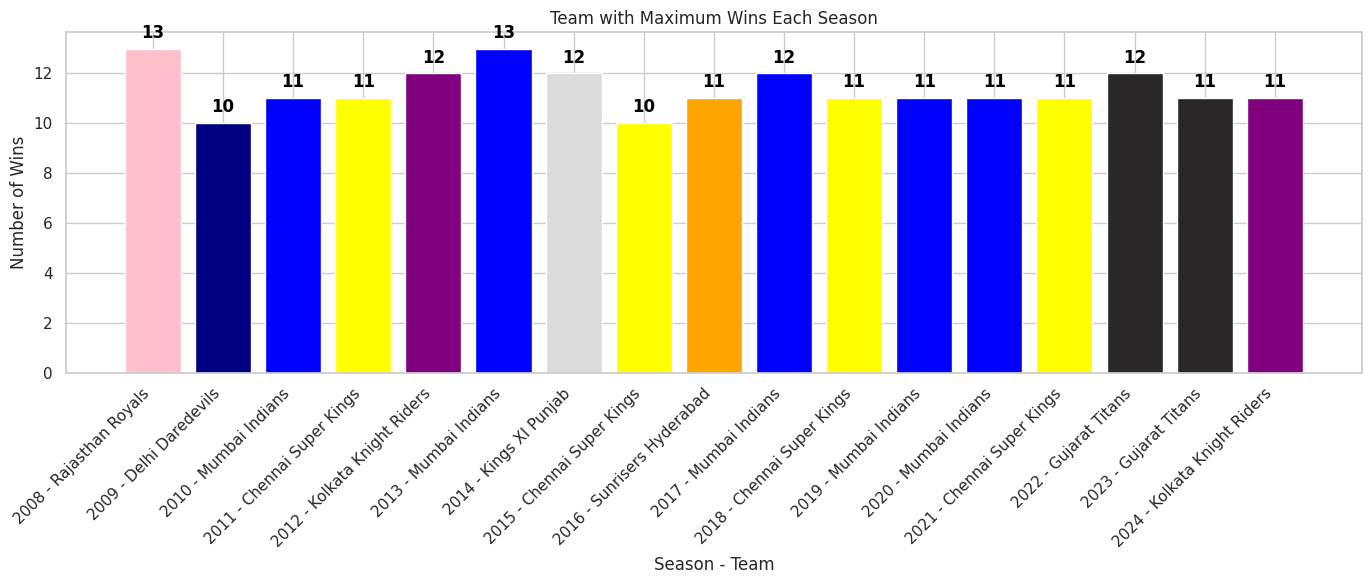

In [ ]:
# 2) Team with Maximum Wins Each Season
season_wins = (
    matches_df
    .groupby(['season','winner'])
    .size()
    .reset_index(name='wins')
)
idx = season_wins.groupby('season')['wins'].idxmax()
season_leaders = season_wins.loc[idx].sort_values('season')

# Define team colors (add more as needed)
team_colors = {
    'Chennai Super Kings': 'yellow',
    'Mumbai Indians': 'blue',
    'Kolkata Knight Riders': 'purple',
    'Royal Challengers Bangalore': 'red',
    'Rajasthan Royals': 'pink',
    'Sunrisers Hyderabad': 'orange',
    'Deccan Chargers': 'lightblue',
    'Gujarat Titans':'#292728',
    'Kings XI Punjab':'#DCDCDC',
    'Delhi Daredevils':'#000080',
    'Rising Pune Supergiant':'#A0205A',
    'Pune Warriors':'#1E100C',
    'Kochi Tuskers Kerala':'#E0FFFF',
    'Delhi Capitals':'#004C93',
    # Add more teams and colors here...
}

# Create a new column for season-team
season_leaders['season_team'] = season_leaders['season'].astype(str) + ' - ' + season_leaders['winner']

plt.figure(figsize=(14, 6))  # Adjust figure size if needed

# Create bar plot with custom colors
bars = plt.bar(season_leaders['season_team'], season_leaders['wins'],
               color=[team_colors.get(team, 'gray') for team in season_leaders['winner']]) # Default to gray if color not found

# Add value labels on bars
for bar, wins in zip(bars, season_leaders['wins']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height+1,  # Adjust position as needed
             str(wins), ha='center', va='top', color='black', fontweight='bold')  # White text on bars

plt.title('Team with Maximum Wins Each Season')
plt.xlabel('Season - Team')  # Updated x-axis label
plt.ylabel('Number of Wins')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.tight_layout()
plt.show()

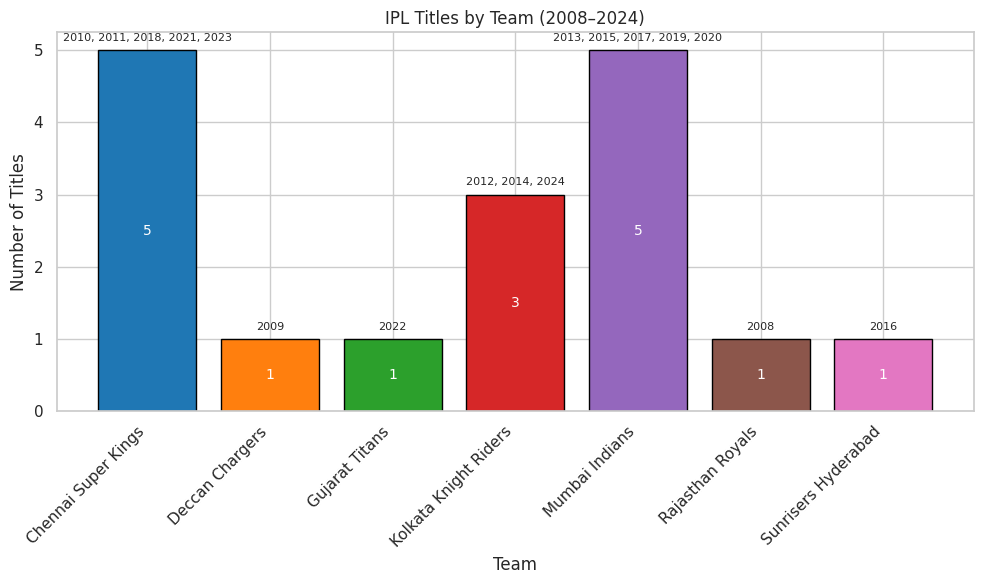

In [ ]:
finals = matches_df.loc[matches_df.groupby('season')['date'].idxmax()]
titles = finals['winner'].value_counts()
titles = finals.groupby('winner')['season'].agg(lambda x: ', '.join(x.astype(str))).reset_index()
titles = titles.rename(columns={'season': 'years_won', 'winner': 'team'})
titles['title_count'] = titles['years_won'].str.split(', ').apply(len) # to count titles
plt.figure(figsize=(10,6))
plt.bar(titles['team'], titles['title_count'], # using team and title_count
        color=colors, edgecolor='black')
for i, row in titles.iterrows(): # modified to access title_count and years_won
    plt.text(i, row['title_count'] / 2, row['title_count'], ha='center', va='center', fontsize=10, color='white')  # Display title count inside the bar in white
    plt.text(i, row['title_count'] + 0.1, row['years_won'], ha='center', va='bottom', fontsize=8)  # Display years won above the bar
plt.title('IPL Titles by Team (2008–2024)')
plt.xlabel('Team')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:

merged_df = deliveries_df.merge(
    matches_df,
    left_on='match_id',
    right_on='id',
    how='inner',
    suffixes=('_del', '_match')
)

merged_df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year,month
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008,4
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008,4
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008,4
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008,4
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,2008,4


In [ ]:
# --- 2. Preprocessing ---
df = merged_df.copy()
df = df[(df['super_over']=='N') & (df['result']!='no result')]
df['city'].fillna('Unknown', inplace=True)
df['player_of_match'].fillna('Not Awarded', inplace=True)
df['umpire2'].fillna('Unknown', inplace=True)
df['date'] = pd.to_datetime(df['date'])
df['runs'] = df['total_runs'] if 'total_runs' in df.columns else df['batsman_runs'] + df['extra_runs']
df['cum_runs'] = df.groupby(['match_id','inning'])['runs'].cumsum()
df['is_wicket'] = df['player_dismissed'].notnull().astype(int) if 'player_dismissed' in df.columns else 0
df['cum_wickets'] = df.groupby(['match_id','inning'])['is_wicket'].cumsum()
final_scores = df.groupby(['match_id','inning'])['cum_runs'].max().reset_index().rename(columns={'cum_runs':'final_score'})
df = df.merge(final_scores, on=['match_id','inning'], how='left')
df.reset_index(drop=True, inplace=True)

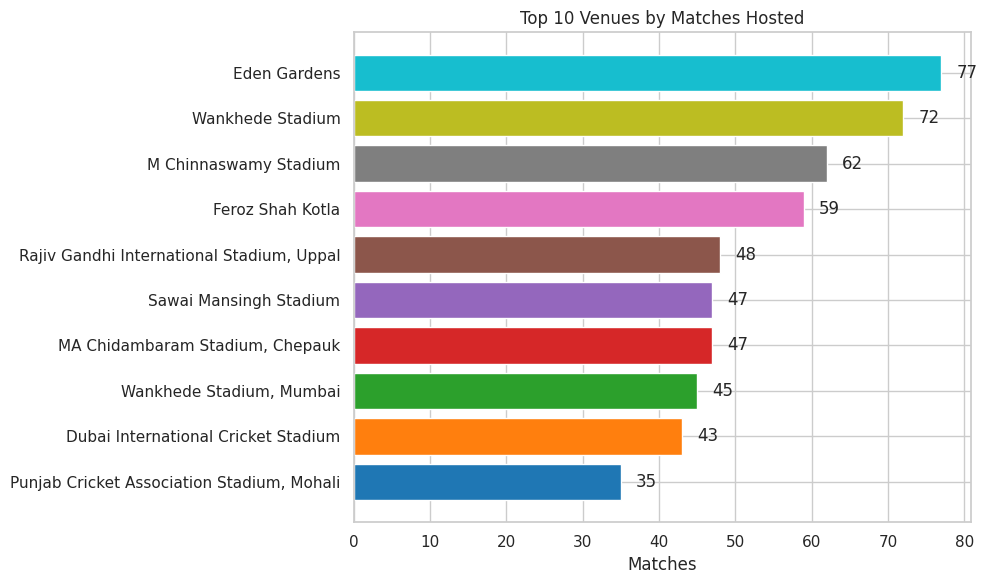

In [ ]:
# 3.2 Top 10 Venues by Matches Hosted
venue_cnt = df[['match_id','venue']].drop_duplicates().venue.value_counts().reset_index()
venue_cnt.columns=['venue','count']
top10 = venue_cnt.head(10)
plt.figure(figsize=(10,6))
# Define colors for the bars (example using a built-in colormap)
colors = plt.cm.tab10(np.arange(10))
plt.barh(top10['venue'][::-1], top10['count'][::-1], color=colors) # Use the defined colors
for i,v in enumerate(top10['count'][::-1]): plt.text(v+2, i, v, va='center')
plt.title('Top 10 Venues by Matches Hosted'); plt.xlabel('Matches'); plt.tight_layout(); plt.show()

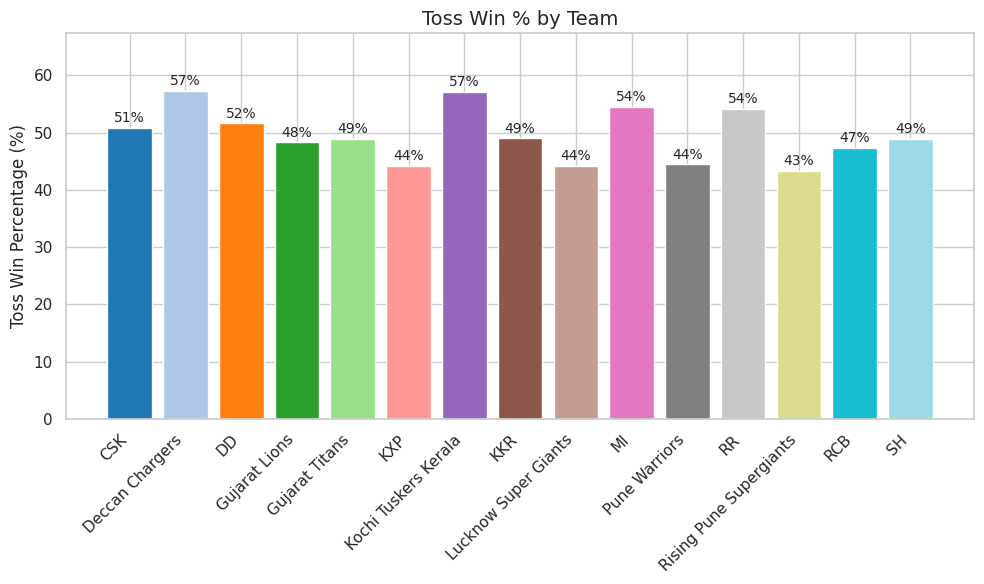

In [ ]:
name_map = {
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Punjab Kings':               'Kings XI Punjab',
    'Delhi Daredevils':           'Delhi Capitals',
    'Rising Pune Supergiant':     'Rising Pune Supergiants',
}
for c in ['team1','team2','toss_winner']:
    matches[c] = matches[c].replace(name_map)

# 2. Filter out no‑results
clean = matches[matches['result'] != 'no result']

# 3. Compute matches played per team
played = (
    clean['team1'].value_counts()
    .add(clean['team2'].value_counts(), fill_value=0)
)

# 4. Compute toss wins per team
toss_wins = clean['toss_winner'].value_counts()

# 5. Toss‑win % per team
toss_pct = (toss_wins / played * 100).dropna()

# 6. Drop any zero‑percent entries
toss_pct = toss_pct[toss_pct > 0]

# 7. Ready labels
teams = toss_pct.index
# abbr = {
#     'Royal Challengers Bangalore':'RCB',
#     'Kings XI Punjab':'KXP',
#     'Delhi Capitals':'DD',
#     'Rajasthan Royals':'RR',
#     'Sunrisers Hyderabad':'SRH',
#     'Mumbai Indians':'MI',
#     'Kolkata Knight Riders':'KKR',
#     'Chennai Super Kings':'CSK'
# }
# labels = [abbr.get(t, t) for t in teams]

# 8. Plot
x = np.arange(len(teams))
plt.figure(figsize=(10,6))
bars = plt.bar(x, toss_pct.values, color=plt.cm.tab20(np.linspace(0,1,len(teams))))

plt.title('Toss Win % by Team', fontsize=14)
plt.xticks(x, labels, rotation=45, ha='right')
plt.ylabel('Toss Win Percentage (%)')
plt.ylim(0, toss_pct.max() + 10)

# 9. Annotate
for i, pct in enumerate(toss_pct.values):
    plt.text(i, pct + 1, f"{pct:.0f}%", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

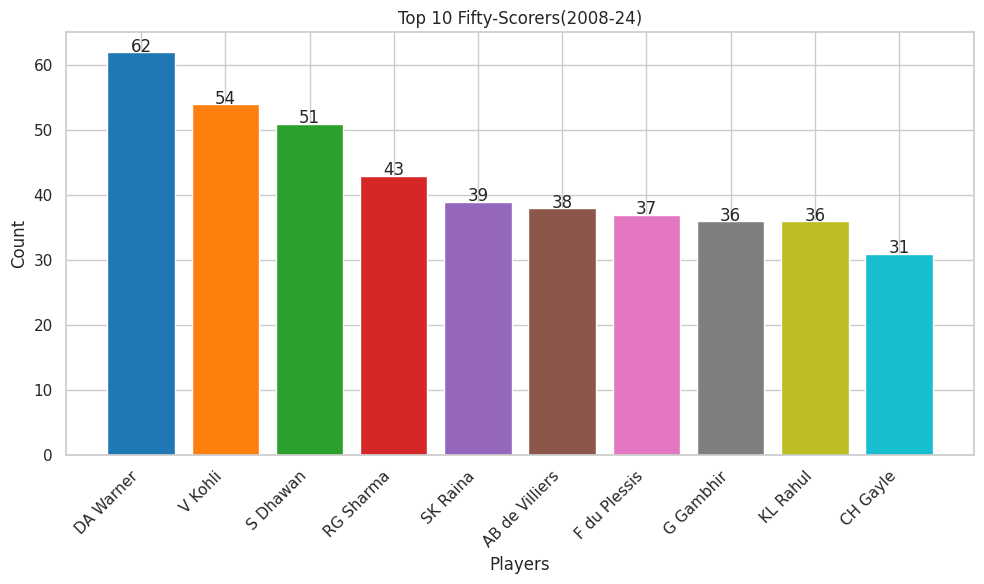

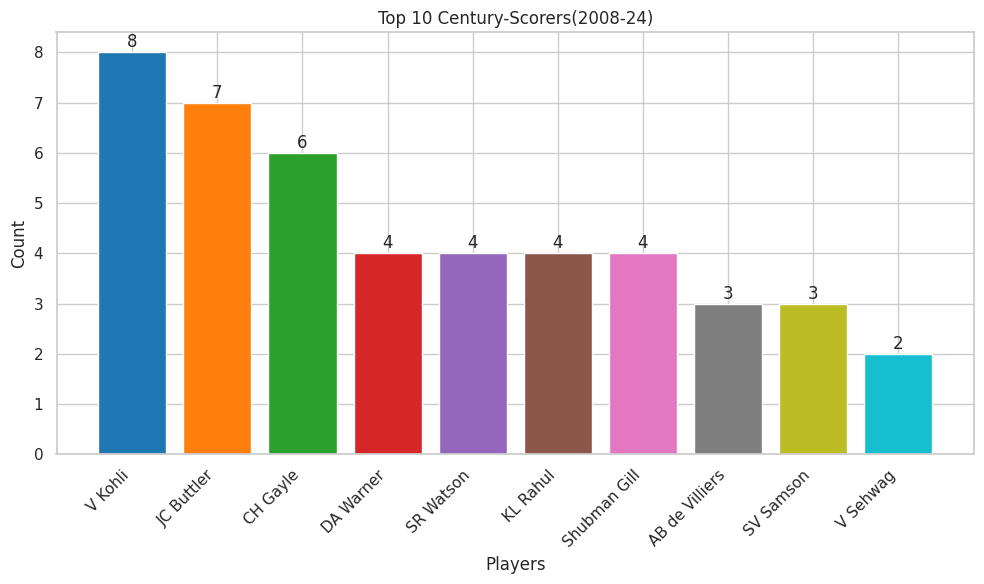

In [ ]:
# 3.6 Top 10 Fifty & Century Scorers
bat_sum = df.groupby(['match_id','batter'])['batsman_runs'].sum().reset_index()
f50 = bat_sum[(bat_sum.batsman_runs>=50)&(bat_sum.batsman_runs<100)].batter.value_counts().head(10)
c100= bat_sum[bat_sum.batsman_runs>=100].batter.value_counts().head(10)
# 50s
plt.figure(figsize=(10,6))
plt.bar(f50.index, f50.values, color=colors[:len(f50)])
for i,v in enumerate(f50.values): plt.text(i,v+0.1,v,ha='center')
plt.title('Top 10 Fifty-Scorers(2008-24)'); plt.xlabel('Players');plt.ylabel('Count'); plt.xticks(rotation=45,ha='right'); plt.tight_layout(); plt.show()
# 100s
plt.figure(figsize=(10,6))
plt.bar(c100.index, c100.values, color=colors[:len(c100)])
for i,v in enumerate(c100.values): plt.text(i,v+0.1,v,ha='center')
plt.title('Top 10 Century-Scorers(2008-24)');plt.xlabel('Players');plt.ylabel('Count'); plt.xticks(rotation=45,ha='right'); plt.tight_layout(); plt.show()

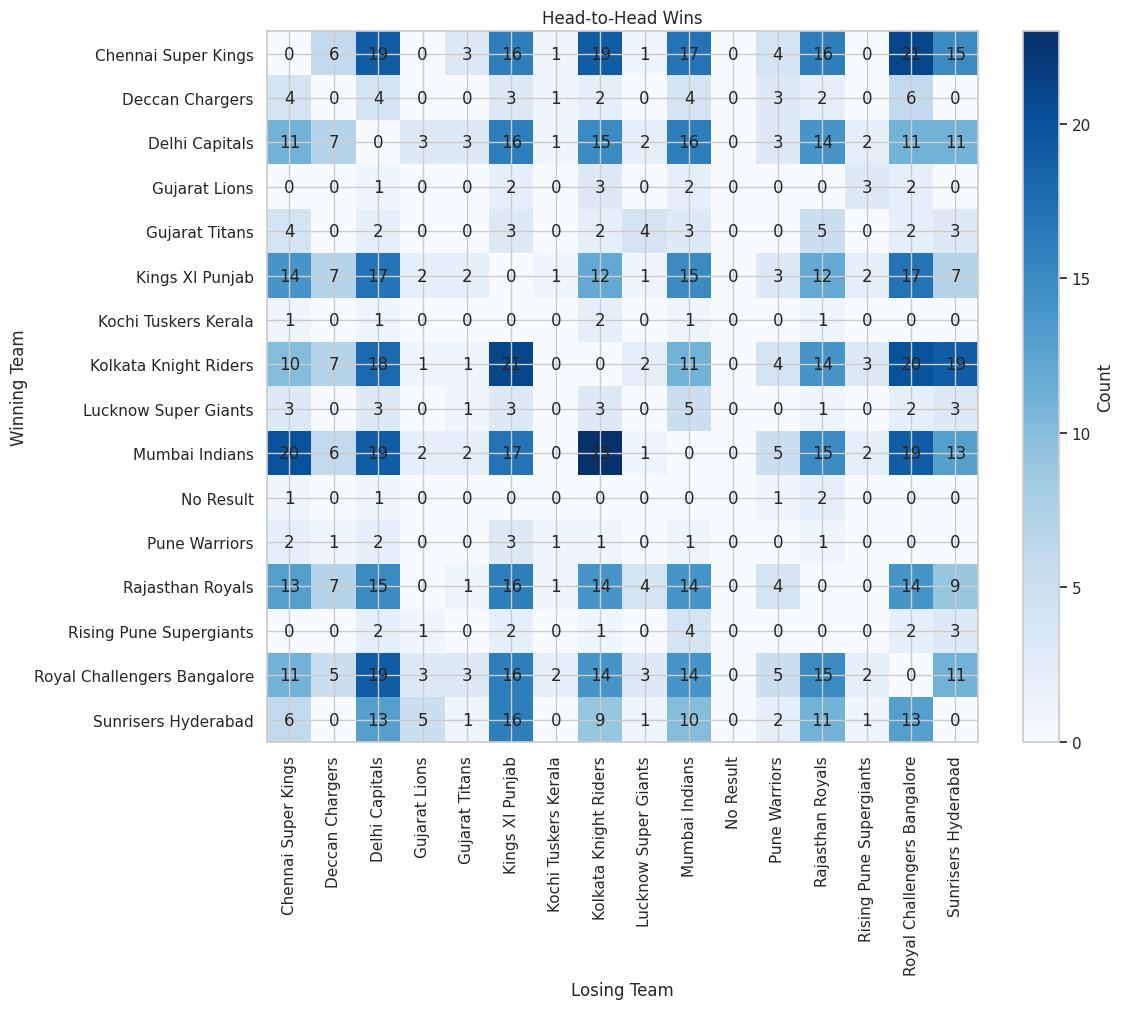

In [ ]:
# 3.7 Head-to-Head Heatmap
teams = sorted(matches_df['winner'].unique())
heat = pd.DataFrame(0, index=teams, columns=teams)
for _,m in matches_df.iterrows():
    w=m['winner']; t1,t2=m['team1'],m['team2']
    loser = t1 if w==t2 else t2
    heat.loc[w, loser] += 1
plt.figure(figsize=(12,10))
plt.imshow(heat, cmap='Blues')
plt.xticks(range(len(teams)), teams, rotation=90)
plt.yticks(range(len(teams)), teams)
for i in range(len(teams)):
    for j in range(len(teams)):
        plt.text(j,i,heat.iloc[i,j],ha='center',va='center')
plt.xlabel("Losing Team")
plt.ylabel("Winning Team")
plt.title('Head-to-Head Wins'); plt.colorbar(label='Count'); plt.tight_layout(); plt.show()

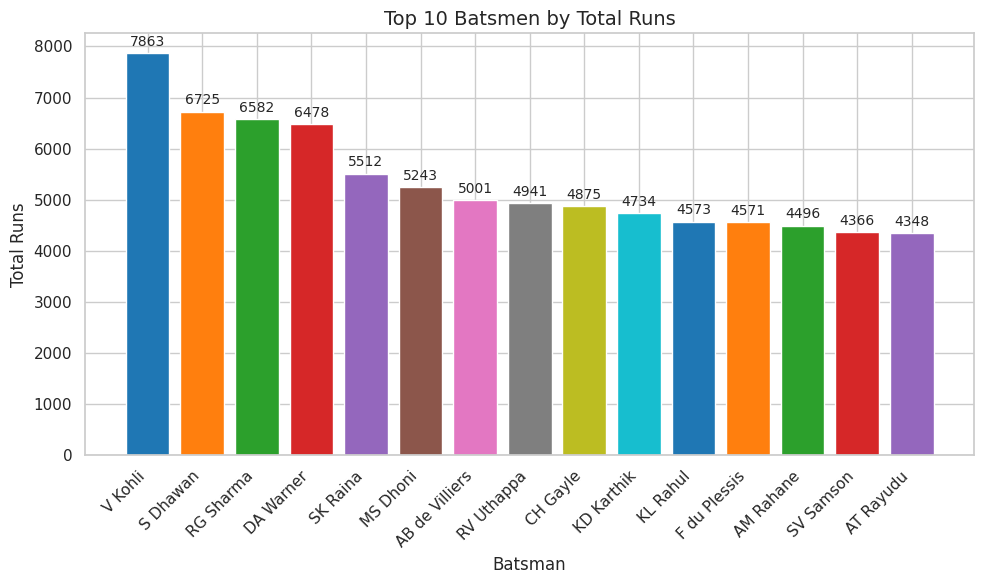

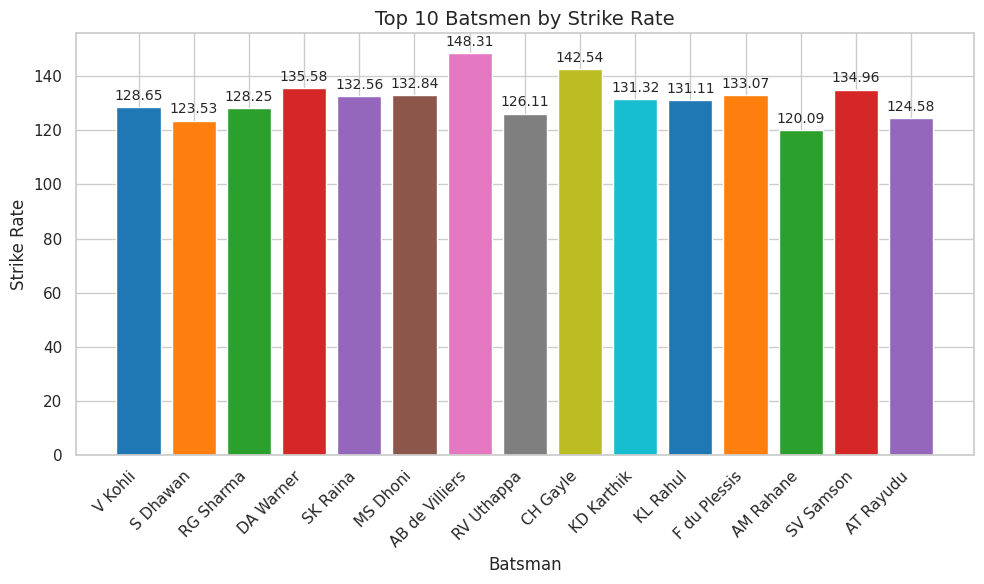

In [ ]:
# 3.8 Batsmen: Runs vs Strike Rate (Bar Plot)
# Plot 1: Top 10 Batsmen by Runs
top10b_runs = bat_sum.groupby('batter')['batsman_runs'].sum().nlargest(15)

plt.figure(figsize=(10, 6))
bars = plt.bar(top10b_runs.index, top10b_runs.values, color=colors[:len(top10b_runs)])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Batsmen by Total Runs', fontsize=14)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Total Runs', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Plot 2: Top 10 Batsmen by Strike Rate
top10b_sr = bat_sum.groupby('batter')['batsman_runs'].sum().nlargest(15)  # Same top 10 batsmen for SR
balls_sr = df.groupby('batter').size().loc[top10b_sr.index]
sr_values = (top10b_sr / balls_sr * 100).round(2)

plt.figure(figsize=(10, 6))
bars = plt.bar(top10b_sr.index, sr_values, color=colors[:len(top10b_sr)])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Batsmen by Strike Rate', fontsize=14)
plt.xlabel('Batsman', fontsize=12)
plt.ylabel('Strike Rate', fontsize=12)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',  # Format with 2 decimal places for SR
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

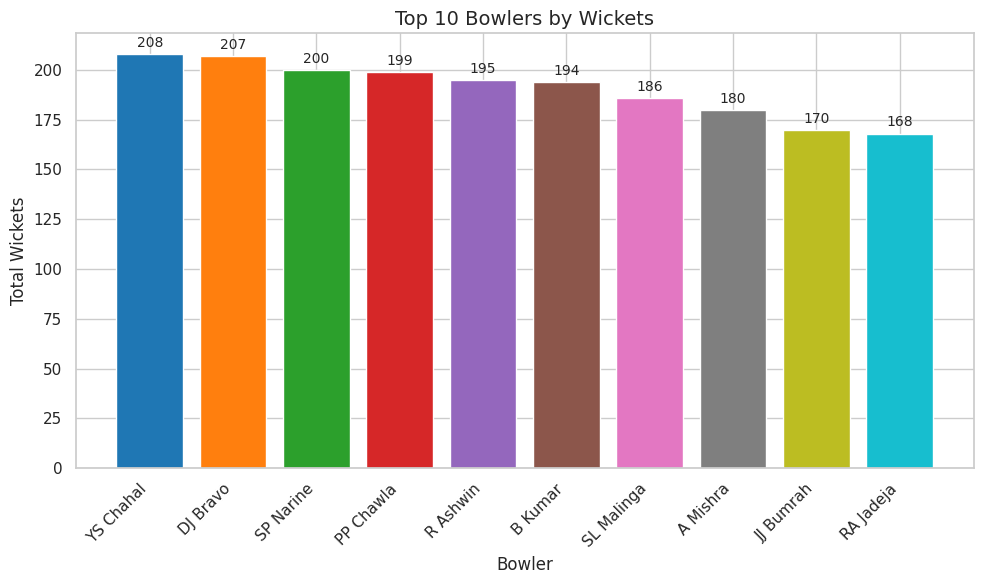

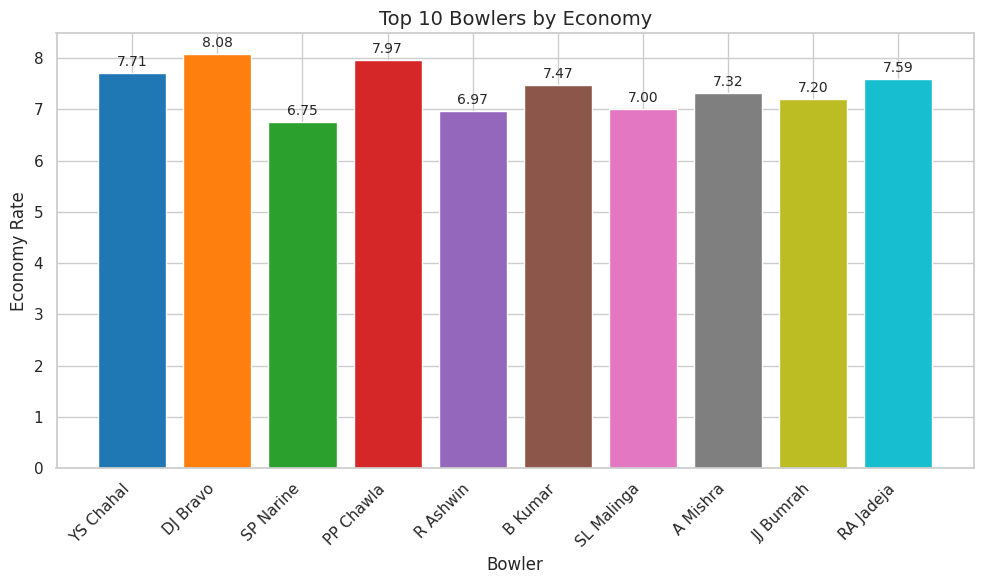

In [ ]:
# 3.9 Bowlers: Wickets and Economy (Separate Bar Plots)
wkt = df[df['player_dismissed'].notnull()].groupby('bowler').size().nlargest(10)
runs_c = df.groupby('bowler')['runs'].sum().loc[wkt.index]
delivs = df.groupby('bowler').size().loc[wkt.index]
econ = (runs_c * 6 / delivs).round(2)

# Create a DataFrame for plotting
plot_df = pd.DataFrame({'bowler': wkt.index, 'wickets': wkt.values, 'economy': econ.values})

# --- Plot 1: Wickets ---
plt.figure(figsize=(10, 6))
bars = plt.bar(plot_df['bowler'], plot_df['wickets'], color=colors[:len(plot_df)])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Bowlers by Wickets', fontsize=14)
plt.xlabel('Bowler', fontsize=12)
plt.ylabel('Total Wickets', fontsize=12)

# Add value labels on bars for wickets
for bar, wickets in zip(bars, plot_df['wickets']):
    height = bar.get_height()
    plt.annotate(f'{wickets:.0f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# --- Plot 2: Economy ---
plt.figure(figsize=(10, 6))
bars = plt.bar(plot_df['bowler'], plot_df['economy'], color=colors[:len(plot_df)])
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Bowlers by Economy', fontsize=14)
plt.xlabel('Bowler', fontsize=12)
plt.ylabel('Economy Rate', fontsize=12)

# Add value labels on bars for economy
for bar, economy in zip(bars, plot_df['economy']):
    height = bar.get_height()
    plt.annotate(f'{economy:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords='offset points',
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

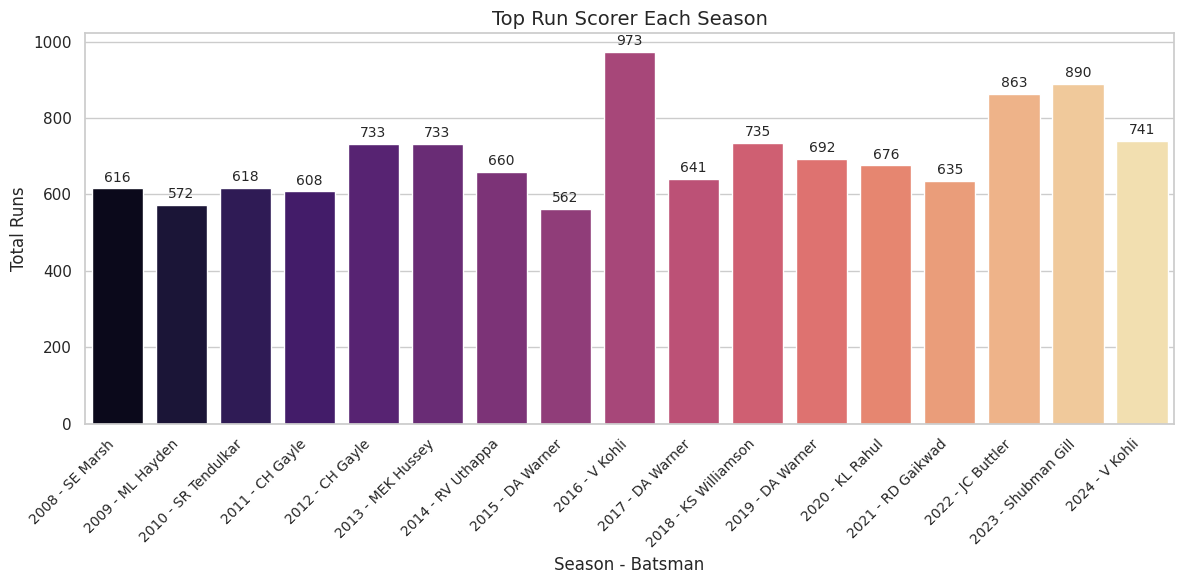

In [ ]:
# Preprocessing: extract season (year)
matches_df['date'] = pd.to_datetime(matches_df['date'])
matches_df['season'] = matches_df['date'].dt.year

# Merge deliveries with season info
data = deliveries_df.merge(
    matches_df[['id', 'season']],
    left_on='match_id', right_on='id',
    how='left'
)
# Aggregate per season and batsman
stats = data.groupby(['season', 'batter']).agg(
    runs=('batsman_runs', 'sum'),
    balls=('batsman_runs', 'count'),
    fours=('batsman_runs', lambda x: (x == 4).sum()),
    sixes=('batsman_runs', lambda x: (x == 6).sum())
).reset_index()
# Compute additional metrics
stats['strike_rate'] = stats['runs'] / stats['balls'] * 100
stats['boundaries'] = stats['fours'] + stats['sixes']
# Filter for meaningful sample size (>=100 balls) for SR plots
sr_stats = stats[stats['balls'] >= 100]
# 1. Top run scorer each season
top_run = stats.loc[stats.groupby('season')['runs'].idxmax()]
# Create a new column combining season and batter
top_run['season_batter'] = top_run['season'].astype(str) + ' - ' + top_run['batter']
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_run, x='season_batter', y='runs', palette='magma')
plt.title('Top Run Scorer Each Season', fontsize=14)
plt.xlabel('Season - Batsman', fontsize=12)  # Updated x-axis label
plt.ylabel('Total Runs', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 10,
            int(height), ha="center", va="bottom", fontsize=10)
plt.tight_layout()
plt.show()


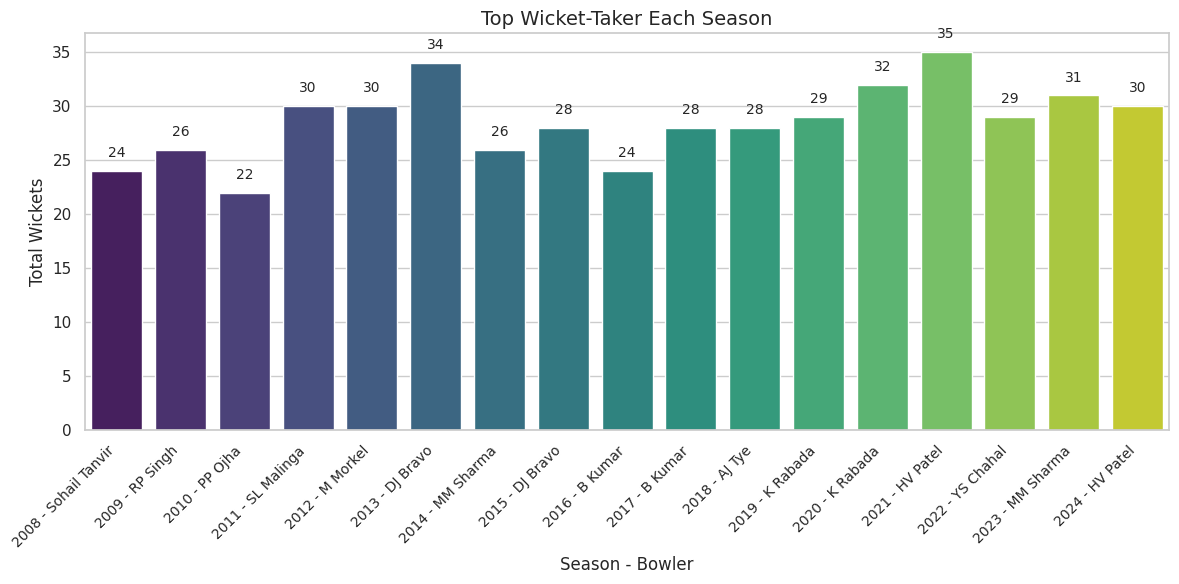

In [ ]:
merged_df = deliveries_df.merge(matches_df[['id', 'season']], left_on='match_id', right_on='id', how='left')

# Filter for wickets (dismissals)
wickets_df = merged_df[merged_df['dismissal_kind'].notna()]

# Group by season and bowler to count wickets
bowler_wickets_per_season = wickets_df.groupby(['season', 'bowler'])['dismissal_kind'].count().reset_index(name='wickets')

# Get top bowler for each season based on wicket count
top_bowlers_per_season = bowler_wickets_per_season.loc[bowler_wickets_per_season.groupby('season')['wickets'].idxmax()]

# Create a new column combining season and bowler
top_bowlers_per_season['season_bowler'] = top_bowlers_per_season['season'].astype(str) + ' - ' + top_bowlers_per_season['bowler']

# Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_bowlers_per_season, x='season_bowler', y='wickets', palette='viridis')
plt.title('Top Wicket-Taker Each Season', fontsize=14)
plt.xlabel('Season - Bowler', fontsize=12)
plt.ylabel('Total Wickets', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1,
            int(height), ha="center", va="bottom", fontsize=10)

plt.tight_layout()
plt.show()

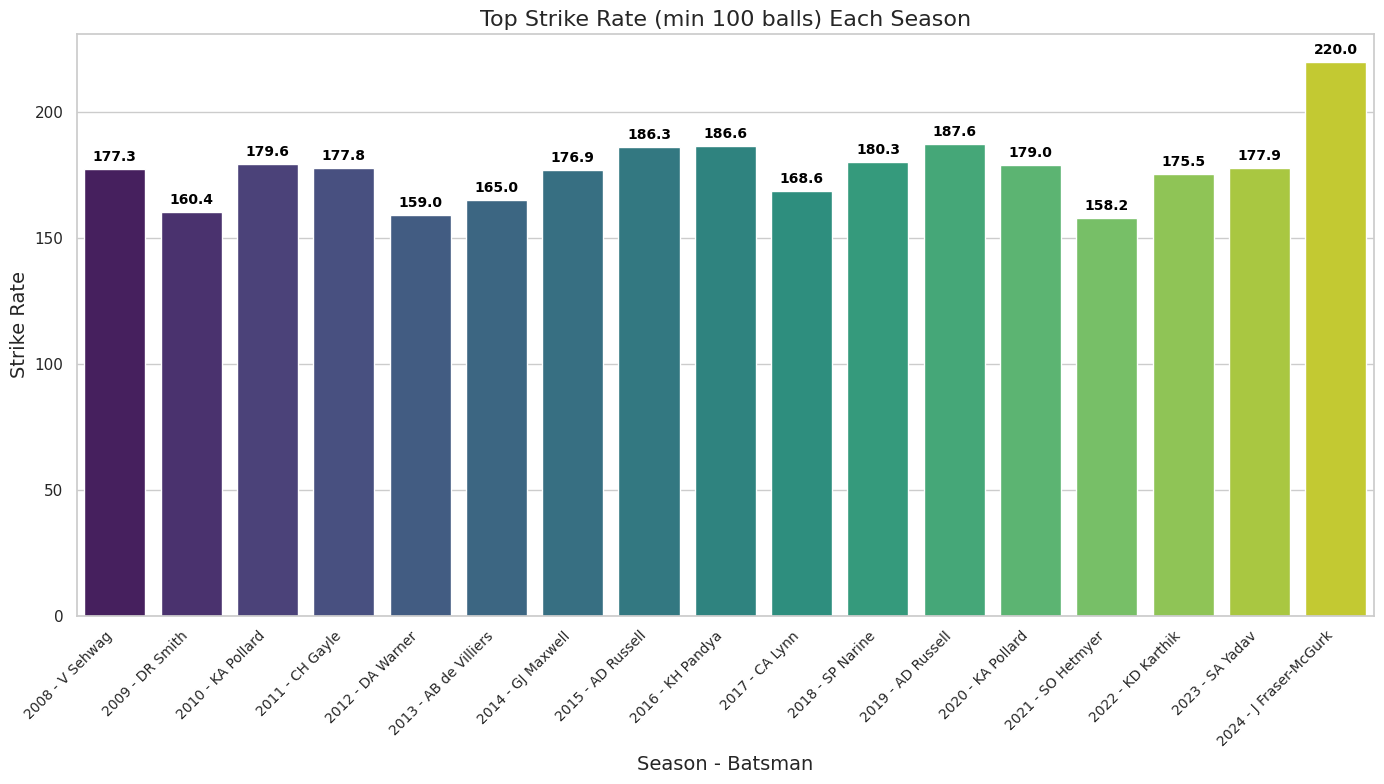

In [ ]:
# 2. Top strike rate each season
top_sr = sr_stats.loc[sr_stats.groupby('season')['strike_rate'].idxmax()]

# Create a new column combining season and batter in the desired format
top_sr['season_batter'] = top_sr['season'].astype(str) + ' - ' + top_sr['batter']

plt.figure(figsize=(14, 8))
ax = sns.barplot(data=top_sr, x='season_batter', y='strike_rate', palette='viridis')  # Use season_batter for x-axis

plt.title('Top Strike Rate (min 100 balls) Each Season', fontsize=16)
plt.xlabel('Season - Batsman', fontsize=14)  # Updated x-axis label
plt.ylabel('Strike Rate', fontsize=14)

# Annotate with strike rate above bars (no need for batter name below anymore)
for i, p in enumerate(ax.patches):
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 2,
            f'{height:.1f}', ha="center", va="bottom", fontsize=10, color='black', fontweight='bold')

# Format x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)  # Rotate for better readability

plt.tight_layout()
plt.show()

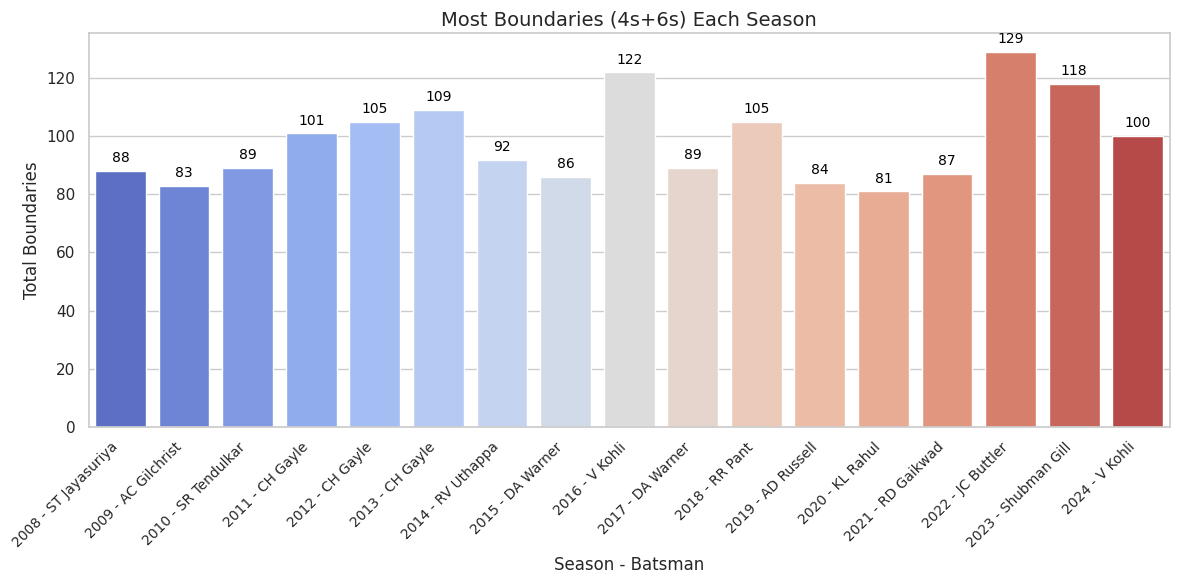

In [ ]:
# 3. Top boundaries each season
top_bound = stats.loc[stats.groupby('season')['boundaries'].idxmax()]

# Create a new column combining season and batter in the desired format
top_bound['season_batter'] = top_bound['season'].astype(str) + ' - ' + top_bound['batter']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_bound, x='season_batter', y='boundaries', palette='coolwarm')  # Using 'season_batter' for x-axis
plt.title('Most Boundaries (4s+6s) Each Season', fontsize=14)
plt.xlabel('Season - Batsman', fontsize=12)  # Updated x-axis label
plt.ylabel('Total Boundaries', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add value labels on bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 2,  # Adjust position as needed
            int(height), ha="center", va="bottom", fontsize=10, color='black')  # Display as integer

plt.tight_layout()
plt.show()

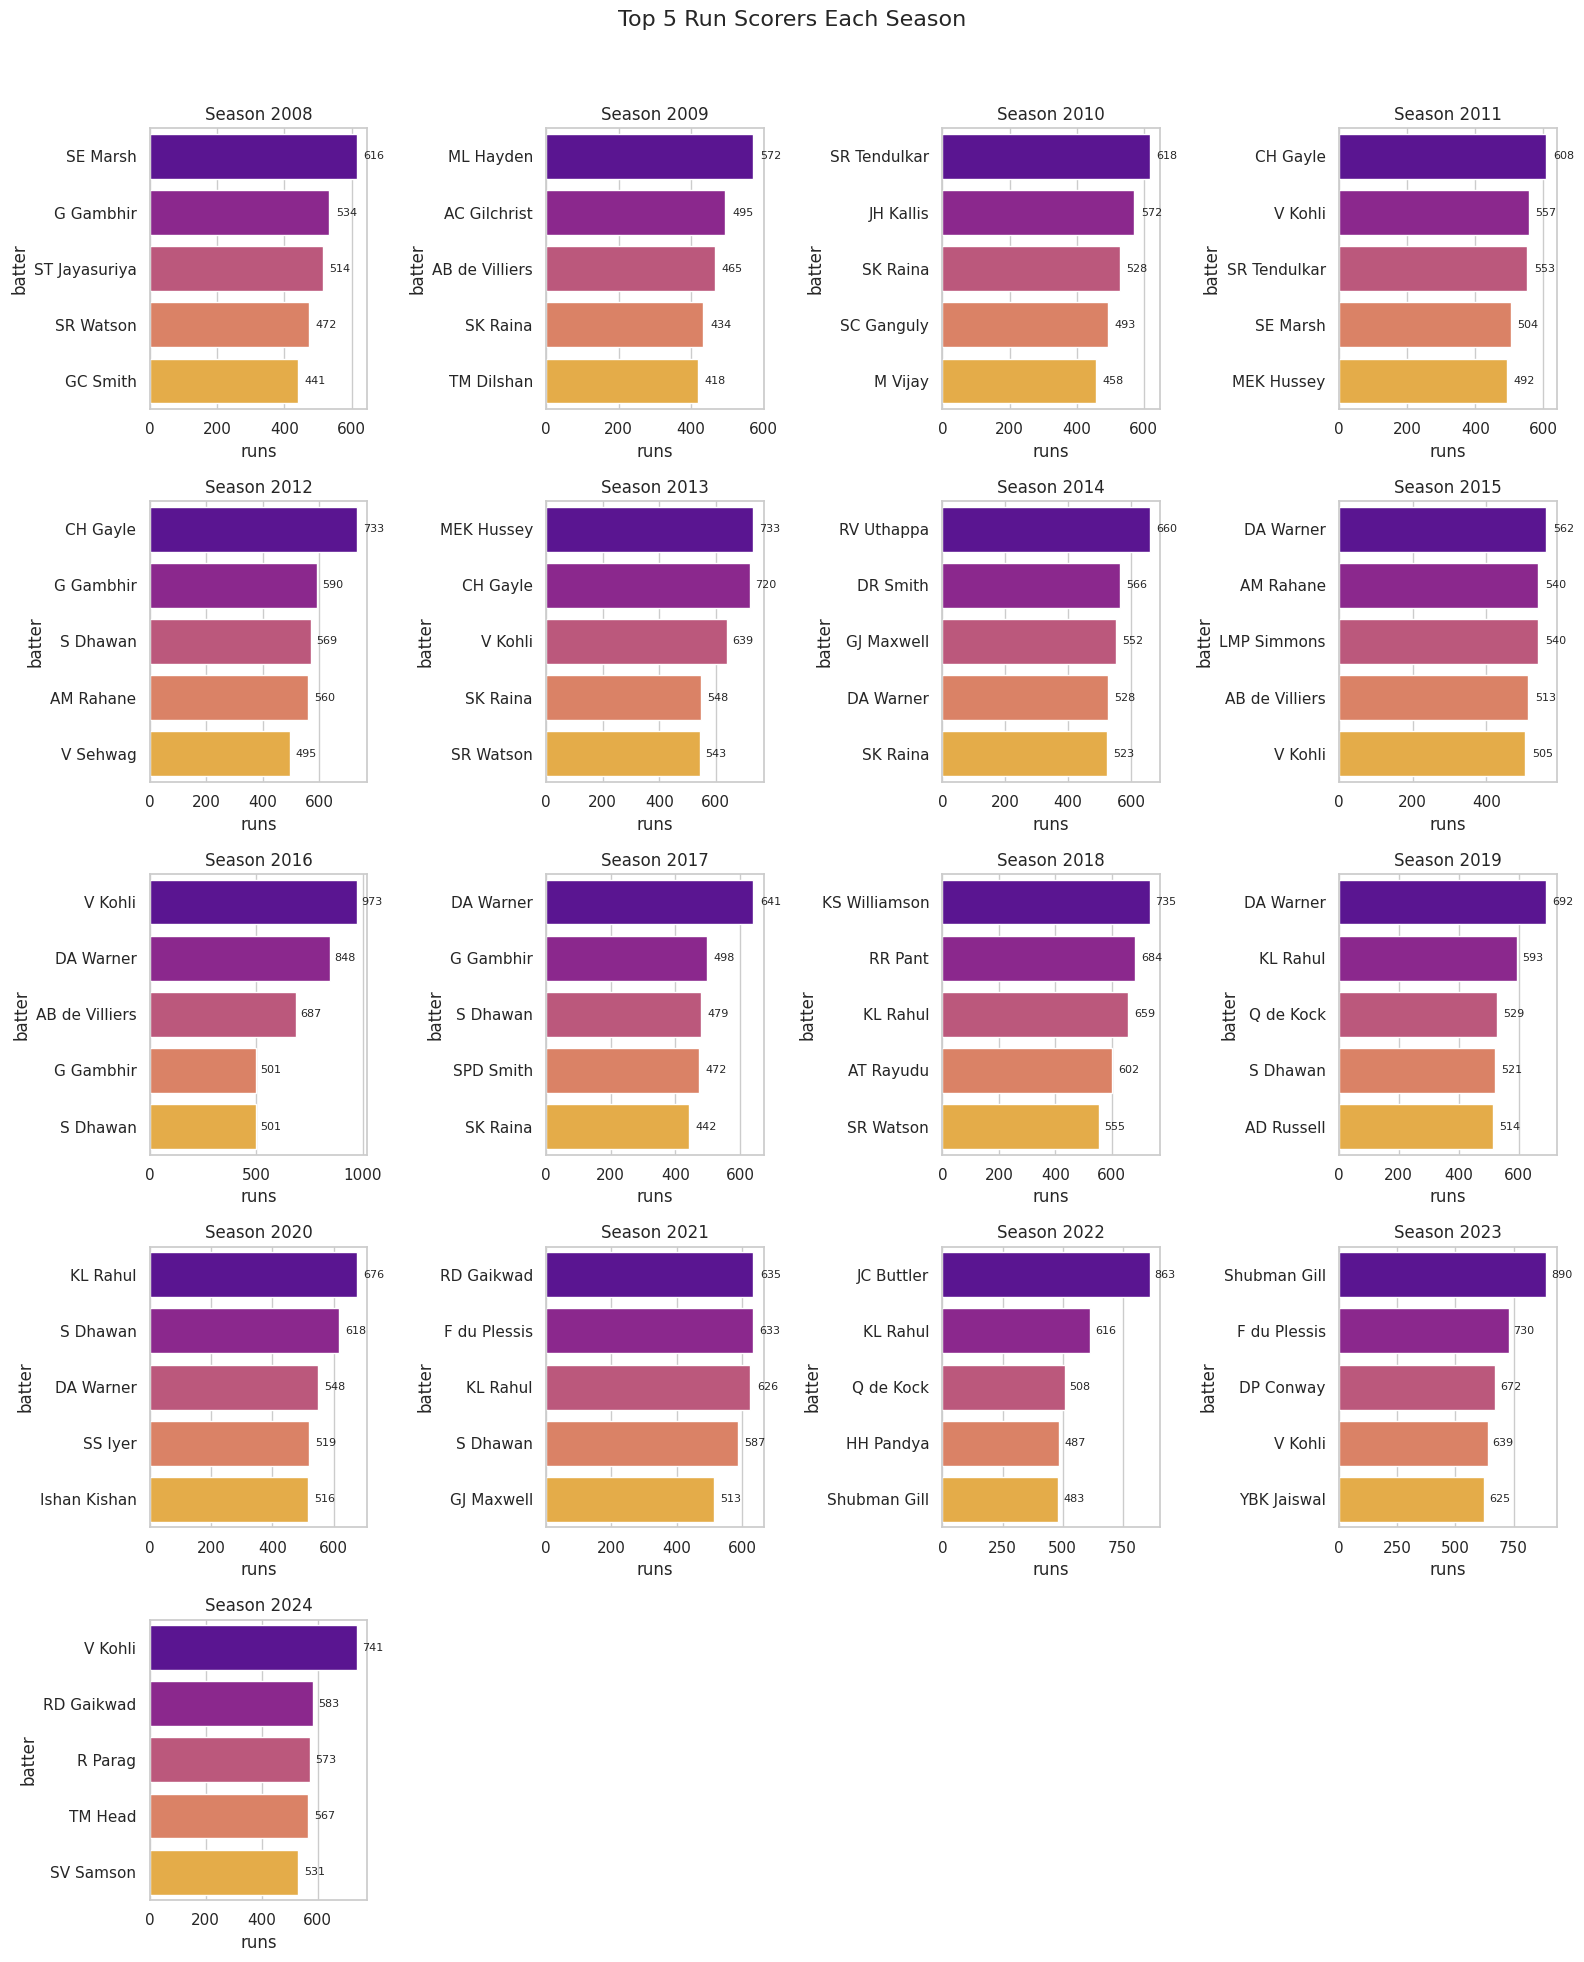

In [ ]:

# 4. Top 5 run scorers each season
seasons = sorted(stats['season'].unique())
n_seasons = len(seasons)
cols = 4
rows = (n_seasons + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(cols*4, rows*4), sharey=False)
axes = axes.flatten()

for i, season in enumerate(seasons):
    ax = axes[i]
    top5 = stats[stats['season'] == season].nlargest(5, 'runs')
    sns.barplot(data=top5, x='runs', y='batter', ax=ax, palette='plasma')
    ax.set_title(f'Season {season}')
    for idx, row in top5.iterrows():
        ax.text(row['runs'] + 20, top5.index.get_loc(idx),
                f"{int(row['runs'])}", va='center', fontsize=8)

# Remove unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Top 5 Run Scorers Each Season', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


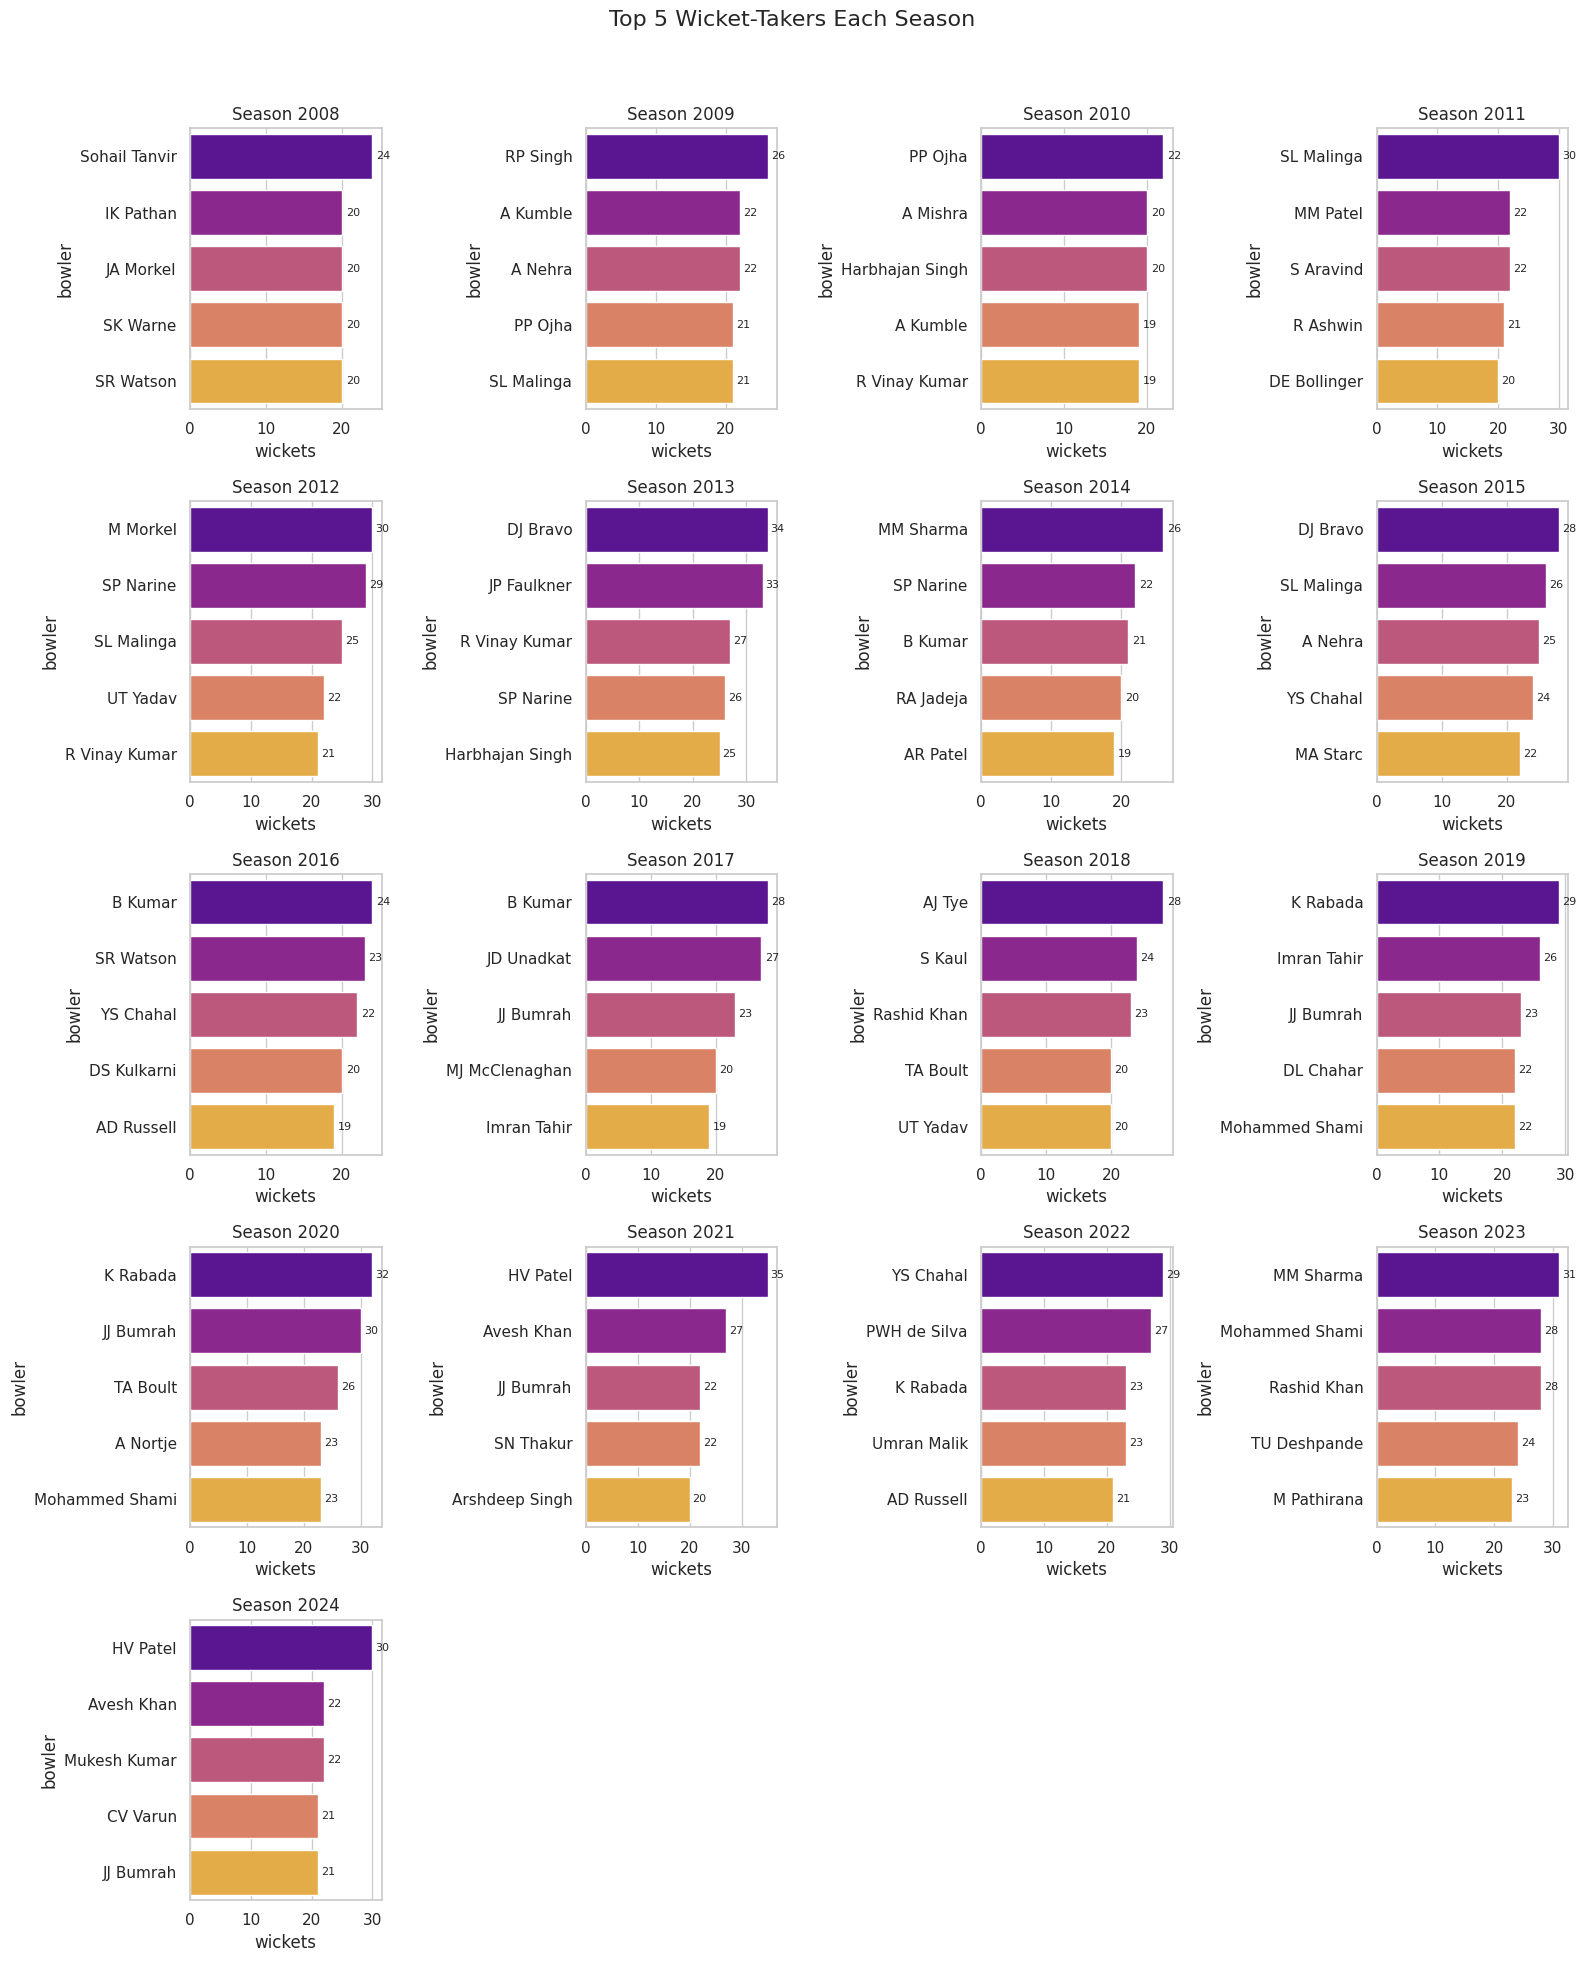

In [ ]:
# Merge deliveries and matches dataframes to get season information
merged_df = deliveries_df.merge(matches_df[['id', 'season']], left_on='match_id', right_on='id', how='left')

# Filter for wickets
wickets_df = merged_df[merged_df['dismissal_kind'].notna()]

# Group by season and bowler to count wickets
bowler_wickets_per_season = wickets_df.groupby(['season', 'bowler'])['dismissal_kind'].count().reset_index(name='wickets')

# Get top 5 bowlers for each season
top_bowlers_per_season = bowler_wickets_per_season.groupby('season').apply(lambda x: x.nlargest(5, 'wickets')).reset_index(drop=True)


# Plotting the top 5 bowlers for each season
seasons = sorted(top_bowlers_per_season['season'].unique())
n_seasons = len(seasons)
cols = 4  # Number of columns in the grid
rows = (n_seasons + cols - 1) // cols  # Number of rows in the grid

fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4), sharey=False)
axes = axes.flatten()

for i, season in enumerate(seasons):
    ax = axes[i]
    top5 = top_bowlers_per_season[top_bowlers_per_season['season'] == season]
    sns.barplot(data=top5, x='wickets', y='bowler', ax=ax, palette='plasma')  # Changed x to 'wickets' and y to 'bowler'
    ax.set_title(f'Season {season}')
    for idx, row in top5.iterrows():
        ax.text(row['wickets'] + 0.5, top5.index.get_loc(idx), f"{int(row['wickets'])}", va='center', fontsize=8)  # Adjusted text position

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Top 5 Wicket-Takers Each Season', fontsize=16)  # Changed title
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


===== FIELDERS ANALYSIS =====
  Processing fielder statistics...

Top 10 Fielders Overall:
          fielder  dismissals  catches  run_outs
533       V Kohli         131    114.0      17.0
455      SK Raina         119    106.0      13.0
390     RA Jadeja         116     97.0      19.0
397     RG Sharma         111    100.0      11.0
228    KA Pollard         106     97.0       9.0
426      S Dhawan         102    100.0       2.0
297     MK Pandey          98     85.0      13.0
125     DA Warner          97     88.0       9.0
158  F du Plessis          87     82.0       5.0
124     DA Miller          86     80.0       6.0

Top 10 Catchers:
          fielder  dismissals  catches  run_outs
533       V Kohli         131    114.0      17.0
455      SK Raina         119    106.0      13.0
426      S Dhawan         102    100.0       2.0
397     RG Sharma         111    100.0      11.0
390     RA Jadeja         116     97.0      19.0
228    KA Pollard         106     97.0       9.0
125     

<Figure size 1200x800 with 0 Axes>

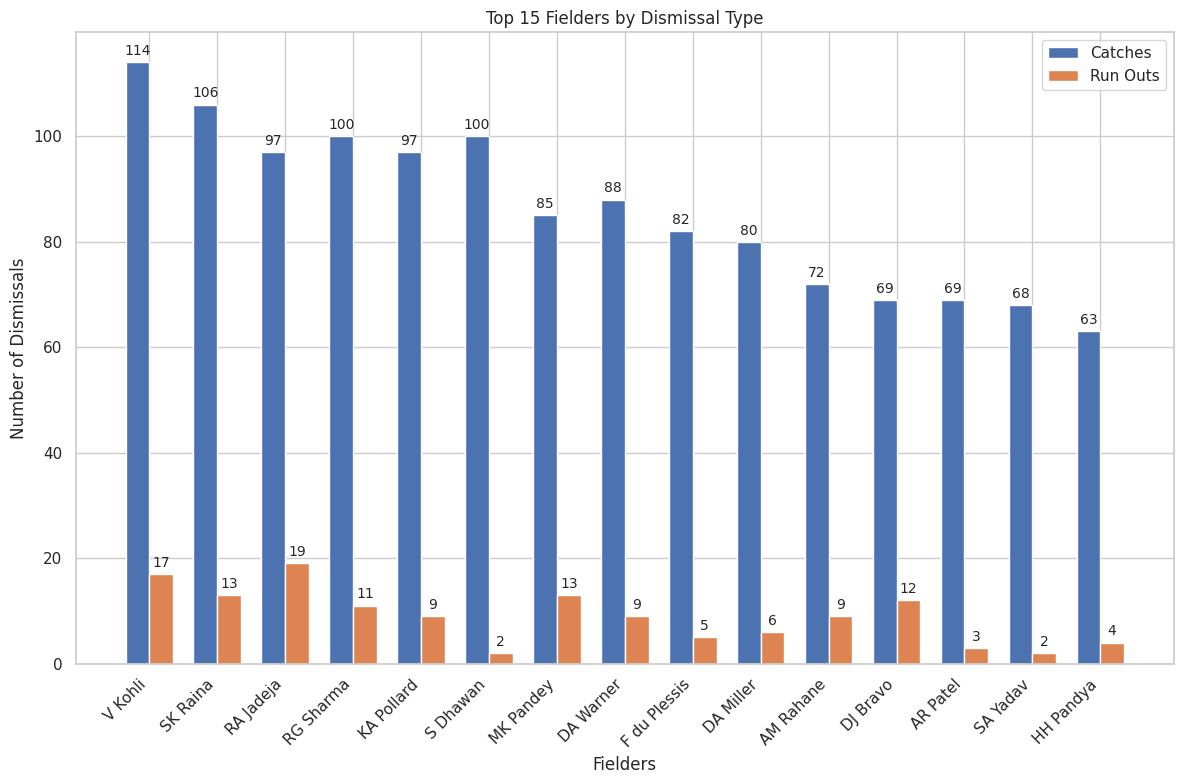

In [ ]:


##########################################
# 3. FIELDERS ANALYSIS
##########################################
print("\n===== FIELDERS ANALYSIS =====")

def analyze_fielders():
    print("  Processing fielder statistics...")

    # Identify wicket keepers by having stumping dismissals
    wk_dismissals = deliveries_df[
        (deliveries_df['is_wicket'] == 1) &
        (deliveries_df['dismissal_kind'] == 'stumped') &
        (~deliveries_df['fielder'].isna())
    ]
    wicket_keepers = wk_dismissals['fielder'].unique()

    # Filter to dismissals involving fielders (excluding wicket-keepers)
    fielding_dismissals = deliveries_df[
        (deliveries_df['is_wicket'] == 1) &
        (deliveries_df['dismissal_kind'].isin(['caught', 'run out'])) &
        (~deliveries_df['fielder'].isna()) &  # Ensure fielder is not NaN
        (~deliveries_df['fielder'].isin(wicket_keepers))  # Exclude wicket-keepers
    ]

    if fielding_dismissals.empty:
        print("  No fielding dismissals found in data!")
        return pd.DataFrame()

    # Count dismissals by fielder
    fielder_stats = fielding_dismissals.groupby('fielder').size().reset_index(name='dismissals')

    # Split into catches and run outs
    caught_dismissals = fielding_dismissals[fielding_dismissals['dismissal_kind'] == 'caught']
    caught_stats = caught_dismissals.groupby('fielder').size().reset_index(name='catches')

    run_out_dismissals = fielding_dismissals[fielding_dismissals['dismissal_kind'] == 'run out']
    run_out_stats = run_out_dismissals.groupby('fielder').size().reset_index(name='run_outs')

    # Merge all fielding stats
    fielder_stats = pd.merge(fielder_stats, caught_stats, on='fielder', how='left')
    fielder_stats = pd.merge(fielder_stats, run_out_stats, on='fielder', how='left')

    fielder_stats['catches'].fillna(0, inplace=True)
    fielder_stats['run_outs'].fillna(0, inplace=True)

    return fielder_stats

# Calculate fielder statistics
fielder_stats = analyze_fielders()

if not fielder_stats.empty:
    # Display top fielders
    top_fielders_overall = fielder_stats.sort_values('dismissals', ascending=False).head(10)
    top_catchers = fielder_stats.sort_values('catches', ascending=False).head(10)
    top_run_out_makers = fielder_stats.sort_values('run_outs', ascending=False).head(10)

    print("\nTop 10 Fielders Overall:")
    print(top_fielders_overall)

    print("\nTop 10 Catchers:")
    print(top_catchers)

    print("\nTop 10 Run Out Makers:")
    print(top_run_out_makers)

    print("  Creating fielder visualization...")
    plt.figure(figsize=(12, 8))
    top_fielders = fielder_stats.sort_values('dismissals', ascending=False).head(15)

    # --- Create grouped bar chart ---
    x = np.arange(len(top_fielders))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 8))
    rects1 = ax.bar(x - width/2, top_fielders['catches'], width, label='Catches')
    rects2 = ax.bar(x + width/2, top_fielders['run_outs'], width, label='Run Outs')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Number of Dismissals')
    ax.set_xlabel('Fielders')
    ax.set_title('Top 15 Fielders by Dismissal Type')
    ax.set_xticks(x)
    ax.set_xticklabels(top_fielders['fielder'], rotation=45, ha='right')
    ax.legend()

    # --- Add value labels on bars ---
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{int(height)}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

else:
    print("  Skipping fielder visualizations due to insufficient data")


===== WICKET KEEPERS ANALYSIS =====
  Processing wicket keeper statistics...

Top Wicket Keepers:
      wicket_keeper  stumpings  catches  total_dismissals
8          MS Dhoni         42      152               194
6        KD Karthik         37      145               182
16   AB de Villiers          8      120               128
7        RV Uthappa         32       92               124
3           WP Saha         26       93               119
28        SV Samson         16       82                98
30          RR Pant         23       75                98
25        Q de Kock         16       70                86
29         KL Rahul          7       78                85
14         PA Patel         16       69                85
11          NV Ojha         10       65                75
5      AC Gilchrist         16       51                67
15        AT Rayudu          2       64                66
32     Ishan Kishan          5       52                57
33       JC Buttler          1 

<Figure size 1200x800 with 0 Axes>

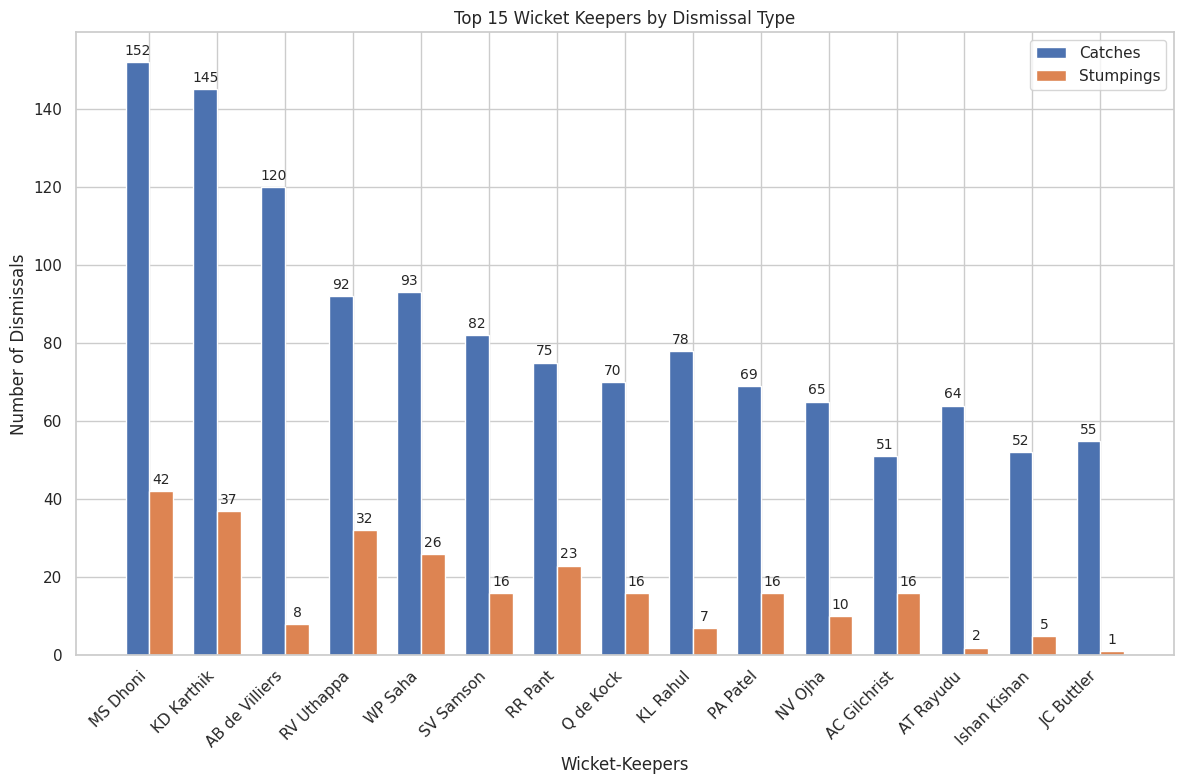

In [ ]:


##########################################
# 4. WICKET KEEPERS ANALYSIS
##########################################
print("\n===== WICKET KEEPERS ANALYSIS =====")

def analyze_wicket_keepers():
    print("  Processing wicket keeper statistics...")
    # Filter to dismissals involving wicket keepers
    wk_dismissals = deliveries_df[
        (deliveries_df['is_wicket'] == 1) &
        (deliveries_df['dismissal_kind'].isin(['stumped', 'caught'])) &
        (~deliveries_df['fielder'].isna())  # Ensure fielder is not NaN
    ]

    if wk_dismissals.empty:
        print("  No wicket keeper dismissals found in data!")
        return pd.DataFrame()

    # Identify wicket keepers by having stumping dismissals
    stumping_dismissals = wk_dismissals[wk_dismissals['dismissal_kind'] == 'stumped']

    if stumping_dismissals.empty:
        print("  No stumpings found in data, cannot identify wicket keepers")
        return pd.DataFrame()

    wicket_keepers = stumping_dismissals['fielder'].unique()

    # For each wicket keeper, count stumpings and catches
    wk_stats = []
    for wk in wicket_keepers:
        if pd.notna(wk):  # Ensure wicket keeper name is not NaN
            stumpings = len(stumping_dismissals[stumping_dismissals['fielder'] == wk])
            catches = len(wk_dismissals[
                (wk_dismissals['fielder'] == wk) &
                (wk_dismissals['dismissal_kind'] == 'caught')
            ])
            wk_stats.append({
                'wicket_keeper': wk,
                'stumpings': stumpings,
                'catches': catches,
                'total_dismissals': stumpings + catches
            })

    return pd.DataFrame(wk_stats).sort_values('total_dismissals', ascending=False)

# Calculate wicket keeper statistics
wk_stats = analyze_wicket_keepers()

if not wk_stats.empty:
    # Display top wicket keepers
    print("\nTop Wicket Keepers:")
    print(wk_stats)

    # Visualize wicket keepers
    print("  Creating wicket keeper visualization...")
    plt.figure(figsize=(12, 8))

    # Use only top 15 for better visualization
    top_wk = wk_stats.head(15)

    # --- Create grouped bar chart ---
    x = np.arange(len(top_wk))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(12, 8))
    rects1 = ax.bar(x - width/2, top_wk['catches'], width, label='Catches')
    rects2 = ax.bar(x + width/2, top_wk['stumpings'], width, label='Stumpings')

    # Add labels, title, and custom x-axis tick labels
    ax.set_ylabel('Number of Dismissals')
    ax.set_xlabel('Wicket-Keepers')
    ax.set_title('Top 15 Wicket Keepers by Dismissal Type')
    ax.set_xticks(x)
    ax.set_xticklabels(top_wk['wicket_keeper'], rotation=45, ha='right')
    ax.legend()

    # --- Add value labels on bars ---
    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate(f'{int(height)}',
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom', fontsize=10)

    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()
    plt.show()

else:
    print("  Skipping wicket keeper visualizations due to insufficient data")


===== VENUE ANALYSIS =====
  Processing venue statistics...

Top 10 Venues by Average Score:
                                                venue   avg_score  max_score  \
1                         Arun Jaitley Stadium, Delhi  200.062500      267.0   
18                   M Chinnaswamy Stadium, Bengaluru  197.214286      288.0   
11                              Eden Gardens, Kolkata  196.625000      262.0   
32  Punjab Cricket Association IS Bindra Stadium, ...  191.200000      258.0   
36  Rajiv Gandhi International Stadium, Uppal, Hyd...  189.384615      278.0   
4                                   Brabourne Stadium  181.400000      213.0   
40                     Sawai Mansingh Stadium, Jaipur  180.500000      215.0   
5                           Brabourne Stadium, Mumbai  178.411765      218.0   
48                           Wankhede Stadium, Mumbai  178.111111      235.0   
13       Himachal Pradesh Cricket Association Stadium  176.666667      233.0   

    matches_played  high_

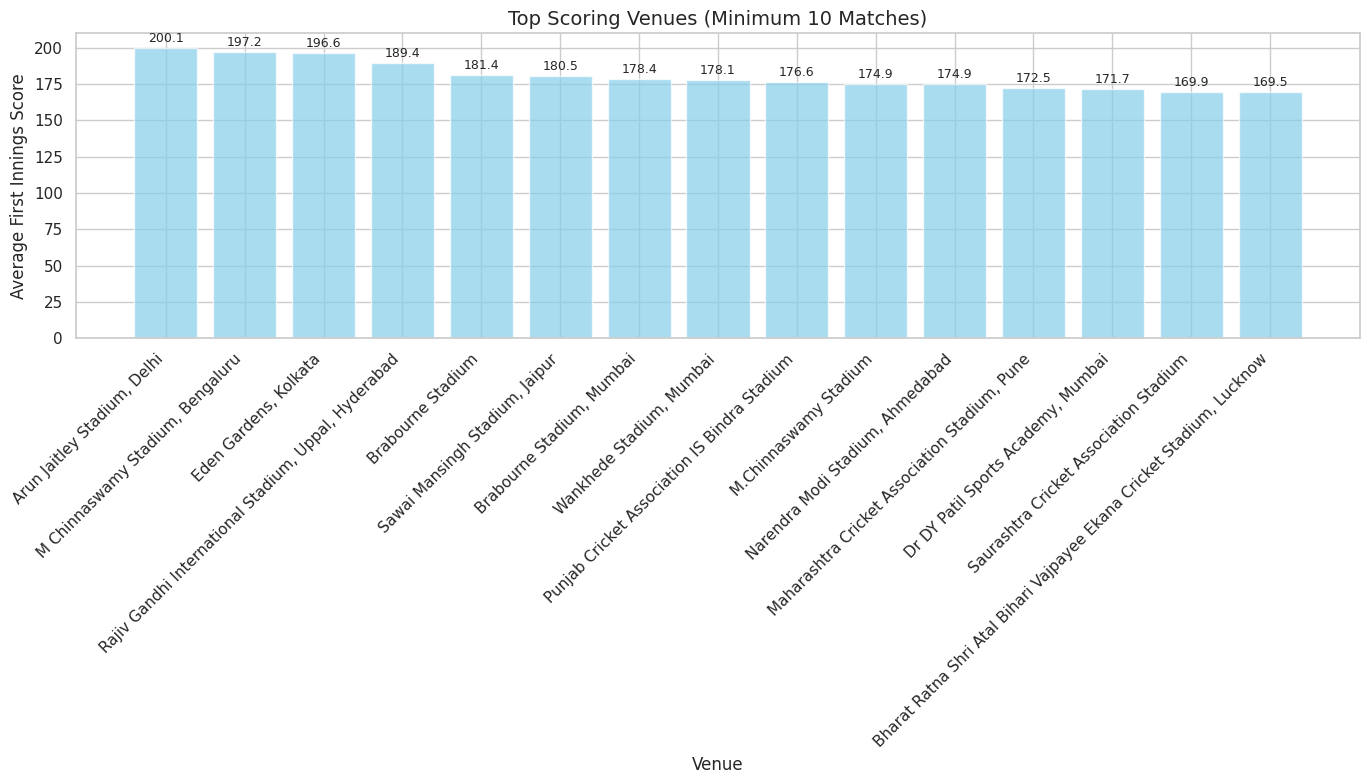

In [ ]:


##########################################
# 5. VENUE ANALYSIS
##########################################
print("\n===== VENUE ANALYSIS =====")

def analyze_venues():
    print("  Processing venue statistics...")
    # Calculate matches played per venue
    venue_matches = matches_df.groupby('venue').size().reset_index(name='matches_played')

    # Calculate the average score for first innings at each venue
    first_innings_scores = matches_df[matches_df['target_runs'].notna()]

    if first_innings_scores.empty:
        print("  No target runs data found for venue analysis")
        return pd.DataFrame()

    venue_avg_score = first_innings_scores.groupby('venue').agg(
        avg_score=('target_runs', 'mean'),
        max_score=('target_runs', 'max'),
        min_score=('target_runs', 'min')
    ).reset_index()

    # Merge with match counts
    venue_stats = pd.merge(venue_avg_score, venue_matches, on='venue')

    # Filter venues with minimum matches played
    min_matches = 5
    venue_stats = venue_stats[venue_stats['matches_played'] >= min_matches]

    # Calculate high scoring frequency (matches with > 180 runs in first innings)
    high_scoring_matches = first_innings_scores[first_innings_scores['target_runs'] > 180]
    high_scoring_venues = high_scoring_matches.groupby('venue').size().reset_index(name='high_scoring_matches')

    venue_stats = pd.merge(venue_stats, high_scoring_venues, on='venue', how='left')
    venue_stats['high_scoring_matches'].fillna(0, inplace=True)
    venue_stats['high_scoring_pct'] = (venue_stats['high_scoring_matches'] / venue_stats['matches_played']) * 100

    return venue_stats

# Calculate venue statistics
venue_stats = analyze_venues()

if not venue_stats.empty:
    # Display top scoring venues
    top_venues_by_avg = venue_stats.sort_values('avg_score', ascending=False).head(10)

    print("\nTop 10 Venues by Average Score:")
    print(top_venues_by_avg[['venue', 'avg_score', 'max_score', 'matches_played', 'high_scoring_pct']])

    # Visualize venue statistics
    print("  Creating venue visualizations...")
    # Filter to venues with at least 10 matches for better visual analysis
    venues_to_plot = venue_stats[venue_stats['matches_played'] >= 10].sort_values('avg_score', ascending=False).head(15)

    if venues_to_plot.empty:
        print("  Not enough venues with 10+ matches for visualization")
        venues_to_plot = venue_stats.sort_values('avg_score', ascending=False).head(10)

    # First venue visualization - average scores
    plt.figure(figsize=(14, 8))

    # Create a bar chart with averages
    bars = plt.bar(venues_to_plot['venue'], venues_to_plot['avg_score'], alpha=0.7, color='skyblue')

    # Add annotations for average score
    for bar, avg in zip(bars, venues_to_plot['avg_score']):
        plt.text(
            bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
            f"{avg:.1f}", ha='center', va='bottom', fontsize=9
        )

    plt.title(f'Top Scoring Venues (Minimum {venues_to_plot["matches_played"].min()} Matches)', fontsize=14)
    plt.xlabel('Venue', fontsize=12)
    plt.ylabel('Average First Innings Score', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # Second venue visualization - high scoring percentage
    # plt.figure(figsize=(14, 8))
    # scatter = sns.scatterplot(
    #     data=venues_to_plot, x='avg_score', y='high_scoring_pct',
    #     size='matches_played', sizes=(50, 500), alpha=0.7
    # )

    # # Add venue annotations
    # for _, row in venues_to_plot.iterrows():
    #     plt.annotate(
    #         row['venue'],
    #         xy=(row['avg_score'], row['high_scoring_pct']),
    #         xytext=(5, 0), textcoords='offset points',
    #         fontsize=9, alpha=0.8
    #     )

    # plt.title('Venues by Average Score and High Scoring Match Percentage', fontsize=14)
    # plt.xlabel('Average First Innings Score', fontsize=12)
    # plt.ylabel('Percentage of High Scoring Matches (>180 runs)', fontsize=12)
    # plt.tight_layout()
    # plt.show()
else:
    print("  Skipping venue visualizations due to insufficient data")


===== TEAM WINNING MARGIN ANALYSIS =====
  Processing team winning margins...

Top 10 Teams by Average Winning Run Margin:
                         winner  matches_won  avg_margin  max_margin  \
17  Royal Challengers Bengaluru            4   42.250000        60.0   
0           Chennai Super Kings           71   34.943662        97.0   
5                Gujarat Titans           11   34.181818        62.0   
16  Royal Challengers Bangalore           53   33.924528       144.0   
8         Kolkata Knight Riders           54   33.592593       140.0   
10               Mumbai Indians           71   32.971831       146.0   
13             Rajasthan Royals           43   30.837209       105.0   
3              Delhi Daredevils           25   27.000000        97.0   
15      Rising Pune Supergiants            2   26.500000        34.0   
6               Kings XI Punjab           40   25.850000       111.0   

    big_margin_pct  
17       75.000000  
0        40.845070  
5        63.636364  

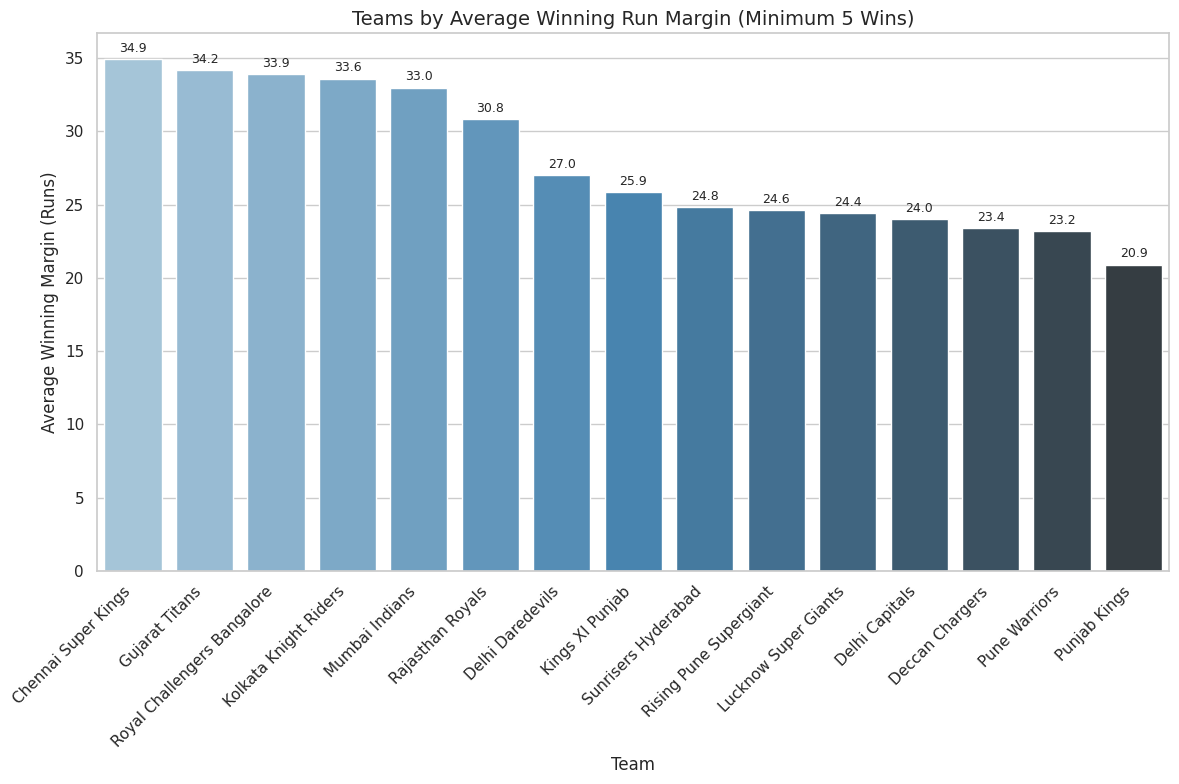


Top 10 Teams by Average Winning Wicket Margin:
                         winner  matches_won  avg_margin  max_margin  \
7          Kochi Tuskers Kerala            4    7.500000         8.0   
18          Sunrisers Hyderabad           43    6.720930        10.0   
15      Rising Pune Supergiants            3    6.666667         9.0   
16  Royal Challengers Bangalore           61    6.573770        10.0   
3              Delhi Daredevils           42    6.547619        10.0   
1               Deccan Chargers           11    6.545455        10.0   
6               Kings XI Punjab           45    6.422222        10.0   
14       Rising Pune Supergiant            5    6.200000         9.0   
8         Kolkata Knight Riders           76    6.197368        10.0   
10               Mumbai Indians           71    6.197183        10.0   

    big_margin_pct  
7       100.000000  
18       58.139535  
15       66.666667  
16       55.737705  
3        50.000000  
1        36.363636  
6        42.

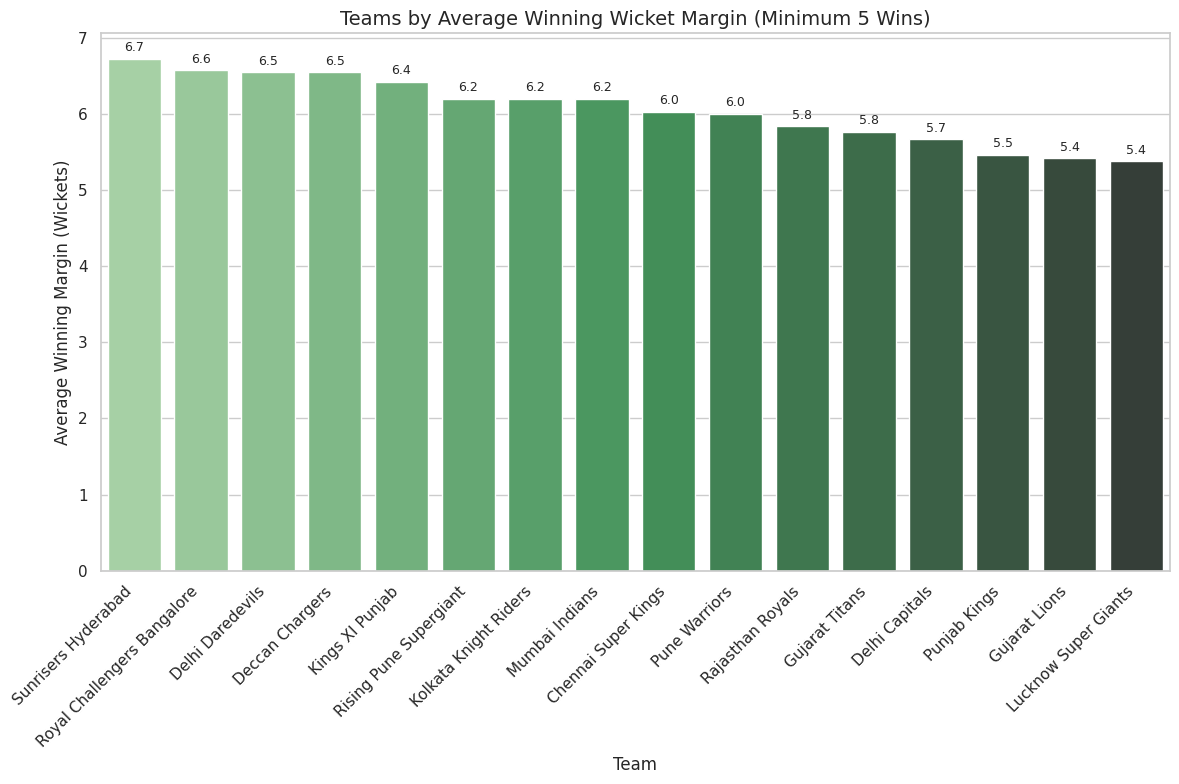

In [ ]:
##########################################
# 6. TEAM WINNING MARGIN ANALYSIS
##########################################
print("\n===== TEAM WINNING MARGIN ANALYSIS =====")

def analyze_winning_margins():
    print("  Processing team winning margins...")
    # Filter matches with a winner
    completed_matches = matches_df[
        matches_df['winner'].notna() &
        (matches_df['winner'] != 'No Result')
    ]

    if completed_matches.empty:
        print("  No completed matches found for winning margin analysis")
        return pd.DataFrame(), pd.DataFrame()

    # Analyze wins by runs (batting first)
    wins_by_runs = completed_matches[completed_matches['result'] == 'runs']

    if not wins_by_runs.empty:
        team_runs_margins = wins_by_runs.groupby('winner').agg(
            matches_won=('result_margin', 'count'),
            avg_margin=('result_margin', 'mean'),
            max_margin=('result_margin', 'max')
        ).reset_index()

        # Calculate big win percentages (>30 runs margin)
        big_margin_threshold = 30
        big_margin_runs = wins_by_runs[wins_by_runs['result_margin'] > big_margin_threshold]
        if not big_margin_runs.empty:
            big_margin_counts = big_margin_runs.groupby('winner').size().reset_index(name='big_margin_wins')
            team_runs_margins = pd.merge(team_runs_margins, big_margin_counts, on='winner', how='left')
            team_runs_margins['big_margin_wins'].fillna(0, inplace=True)
            team_runs_margins['big_margin_pct'] = (team_runs_margins['big_margin_wins'] / team_runs_margins['matches_won']) * 100
        else:
            team_runs_margins['big_margin_wins'] = 0
            team_runs_margins['big_margin_pct'] = 0
    else:
        team_runs_margins = pd.DataFrame()

    # Analyze wins by wickets (batting second)
    wins_by_wickets = completed_matches[completed_matches['result'] == 'wickets']

    if not wins_by_wickets.empty:
        team_wicket_margins = wins_by_wickets.groupby('winner').agg(
            matches_won=('result_margin', 'count'),
            avg_margin=('result_margin', 'mean'),
            max_margin=('result_margin', 'max')
        ).reset_index()

        # Calculate big win percentages (>=7 wickets margin)
        big_margin_threshold = 7
        big_margin_wickets = wins_by_wickets[wins_by_wickets['result_margin'] >= big_margin_threshold]
        if not big_margin_wickets.empty:
            big_margin_counts = big_margin_wickets.groupby('winner').size().reset_index(name='big_margin_wins')
            team_wicket_margins = pd.merge(team_wicket_margins, big_margin_counts, on='winner', how='left')
            team_wicket_margins['big_margin_wins'].fillna(0, inplace=True)
            team_wicket_margins['big_margin_pct'] = (team_wicket_margins['big_margin_wins'] / team_wicket_margins['matches_won']) * 100
        else:
            team_wicket_margins['big_margin_wins'] = 0
            team_wicket_margins['big_margin_pct'] = 0
    else:
        team_wicket_margins = pd.DataFrame()

    return team_runs_margins, team_wicket_margins

# Calculate team winning margins
team_runs_margins, team_wicket_margins = analyze_winning_margins()

# Display top teams by winning margins
if not team_runs_margins.empty:
    top_teams_by_runs = team_runs_margins.sort_values('avg_margin', ascending=False).head(10)
    print("\nTop 10 Teams by Average Winning Run Margin:")
    print(top_teams_by_runs[['winner', 'matches_won', 'avg_margin', 'max_margin', 'big_margin_pct']])

    # Visualize teams by winning run margins
    print("  Creating team run margin visualization...")
    # Minimum 5 wins by runs to make the analysis meaningful
    teams_to_plot = team_runs_margins[team_runs_margins['matches_won'] >= 5].sort_values('avg_margin', ascending=False)

    if teams_to_plot.empty:
        print("  Not enough teams with 5+ wins by runs for visualization")
        teams_to_plot = team_runs_margins.sort_values('avg_margin', ascending=False).head(10)

    plt.figure(figsize=(12, 8))

    # Create a bar chart
    ax = sns.barplot(x='winner', y='avg_margin', data=teams_to_plot, palette='Blues_d')

    # Add annotations for average margin
    for i, row in enumerate(teams_to_plot.itertuples()):
        ax.text(i, row.avg_margin + 0.5, f"{row.avg_margin:.1f}", ha='center', fontsize=9)

    plt.title(f'Teams by Average Winning Run Margin (Minimum {teams_to_plot["matches_won"].min()} Wins)', fontsize=14)
    plt.xlabel('Team', fontsize=12)
    plt.ylabel('Average Winning Margin (Runs)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("  No data for runs winning margin analysis")

if not team_wicket_margins.empty:
    top_teams_by_wickets = team_wicket_margins.sort_values('avg_margin', ascending=False).head(10)
    print("\nTop 10 Teams by Average Winning Wicket Margin:")
    print(top_teams_by_wickets[['winner', 'matches_won', 'avg_margin', 'max_margin', 'big_margin_pct']])

    # Visualize teams by winning wicket margins
    print("  Creating team wicket margin visualization...")
    # Minimum 5 wins by wickets to make the analysis meaningful
    teams_to_plot = team_wicket_margins[team_wicket_margins['matches_won'] >= 5].sort_values('avg_margin', ascending=False)

    if teams_to_plot.empty:
        print("  Not enough teams with 5+ wins by wickets for visualization")
        teams_to_plot = team_wicket_margins.sort_values('avg_margin', ascending=False).head(10)

    plt.figure(figsize=(12, 8))

    # Create a bar chart
    ax = sns.barplot(x='winner', y='avg_margin', data=teams_to_plot, palette='Greens_d')

    # Add annotations for average margin
    for i, row in enumerate(teams_to_plot.itertuples()):
        ax.text(i, row.avg_margin + 0.1, f"{row.avg_margin:.1f}", ha='center', fontsize=9)

    plt.title(f'Teams by Average Winning Wicket Margin (Minimum {teams_to_plot["matches_won"].min()} Wins)', fontsize=14)
    plt.xlabel('Team', fontsize=12)
    plt.ylabel('Average Winning Margin (Wickets)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("  No data for wickets winning margin analysis")